# base GRN constuction

In [15]:
import sys
sys.path.append('./04_Skin_Fibroblast/software_packages/')

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, shutil, importlib, glob
from tqdm.notebook import tqdm
from celloracle import motif_analysis as ma
import celloracle as co
co.__version__
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [4]:
# Load scATAC-seq peak list.
peaks = pd.read_csv("./04_Skin_Fibroblast/all_peaks_nc.csv", index_col=0)
peaks = peaks.x.values

In [10]:
peaks

array(['chr1-3094494-3095551', 'chr1-3119700-3120272',
       'chr1-3132253-3132484', ..., 'chrY-90807495-90807910',
       'chrY-90810897-90811155', 'chrY-90811361-90813122'], dtype=object)

In [11]:
peaks = np.array([peak.replace('-', '_') for peak in peaks], dtype=object)

In [12]:
peaks

array(['chr1_3094494_3095551', 'chr1_3119700_3120272',
       'chr1_3132253_3132484', ..., 'chrY_90807495_90807910',
       'chrY_90810897_90811155', 'chrY_90811361_90813122'], dtype=object)

In [20]:
# Load Cicero coaccessibility scores.
cicero_connections = pd.read_csv("./04_Skin_Fibroblast/cicero_connections_nc.csv", index_col=0)
cicero_connections['Peak1'] = cicero_connections['Peak1'].str.replace('-', '_')
cicero_connections['Peak2'] = cicero_connections['Peak2'].str.replace('-', '_')
cicero_connections.head()

Peak1                    Peak2  coaccess
1  chr12_100003033_100003569  chr12_99795207_99795748  0.017628
2  chr12_100003033_100003569  chr12_99796068_99796355  0.007104
3  chr12_100003033_100003569  chr12_99807776_99808336  0.045974
4  chr12_100003033_100003569  chr12_99819267_99819941  0.007339
5  chr12_100003033_100003569  chr12_99836283_99837209  0.002761

In [22]:
cicero_connections

Peak1                      Peak2  coaccess
1       chr12_100003033_100003569    chr12_99795207_99795748  0.017628
2       chr12_100003033_100003569    chr12_99796068_99796355  0.007104
3       chr12_100003033_100003569    chr12_99807776_99808336  0.045974
4       chr12_100003033_100003569    chr12_99819267_99819941  0.007339
5       chr12_100003033_100003569    chr12_99836283_99837209  0.002761
...                           ...                        ...       ...
567253    chr12_99979599_99980021  chr12_100212452_100212736  0.000000
567254    chr12_99979599_99980021  chr12_100219749_100220401  0.000000
567255    chr12_99979599_99980021  chr12_100222534_100222947  0.000000
567256    chr12_99979599_99980021  chr12_100239482_100240156  0.000000
567257    chr12_99979599_99980021  chr12_100242073_100242851  0.000000

[559692 rows x 3 columns]

In [15]:
##!! Please make sure to specify the correct reference genome here
tss_annotated = ma.get_tss_info(peak_str_list=peaks, ref_genome="mm10")

# Check results
tss_annotated.tail()

que bed peaks: 175103
tss peaks in que: 19184


chr      start        end gene_short_name strand
19179   chr6   94500073   94500748        Slc25a26      +
19180   chr5  119199996  119200721          Gm7538      -
19181  chr19   45658883   45660733           Fbxw4      -
19182  chr12  100899238  100899438           Gpr68      -
19183   chr4  129491197  129491782         Fam229a      -

In [21]:
integrated = ma.integrate_tss_peak_with_cicero(tss_peak=tss_annotated,
                                               cicero_connections=cicero_connections)
print(integrated.shape)
integrated.head()

(27134, 3)


peak_id gene_short_name  coaccess
0  chr10_100015488_100016727            Kitl       1.0
1  chr10_100486639_100487928           Tmtc3       1.0
2  chr10_100588772_100589484   4930430F08Rik       1.0
3  chr10_102158814_102159138          Mgat4c       1.0
4  chr10_102374028_102374278          Mgat4c       1.0

In [23]:
integrated

peak_id gene_short_name  coaccess
0      chr10_100015488_100016727            Kitl       1.0
1      chr10_100486639_100487928           Tmtc3       1.0
2      chr10_100588772_100589484   4930430F08Rik       1.0
3      chr10_102158814_102159138          Mgat4c       1.0
4      chr10_102374028_102374278          Mgat4c       1.0
...                          ...             ...       ...
27129     chrX_99819395_99820316          Tmem28       1.0
27130     chrX_99974961_99976910             Eda       1.0
27131       chrY_1010031_1010799         Eif2s3y       1.0
27132       chrY_1245357_1246009             Uty       1.0
27133       chrY_1285774_1286829           Ddx3y       1.0

[27134 rows x 3 columns]

In [26]:
peak = integrated[integrated.coaccess >= 0.8]
peak = peak[["peak_id", "gene_short_name"]].reset_index(drop=True)

In [28]:
print(peak.shape)
peak.head()

(18020, 2)


peak_id gene_short_name
0  chr10_100015488_100016727            Kitl
1  chr10_100486639_100487928           Tmtc3
2  chr10_100588772_100589484   4930430F08Rik
3  chr10_102158814_102159138          Mgat4c
4  chr10_102374028_102374278          Mgat4c

In [30]:
peak.to_csv("./04_Skin_Fibroblast/celloracle/csv/processed_peak_file.csv")

## TF scan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./04_Skin_Fibroblast/software_packages/')
import celloracle as co
import genomepy
import seaborn as sns
import os, sys, shutil, importlib, glob
from tqdm.notebook import tqdm
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from celloracle import motif_analysis as ma
from celloracle.utility import save_as_pickled_object
co.__version__
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams["savefig.dpi"] = 600

In [2]:
genomepy.clean

<function genomepy.caching.clean()>

In [ ]:
from genomepy.providers import LocalProvider
genome_fasta = "./04_Skin_Fibroblast/celloracle/mm10/mm10.fa"
genomes_dir = "./04_Skin_Fibroblast/celloracle/genome/"

provider = LocalProvider()

provider.download_genome(genome_fasta, genomes_dir, "mm10")

In [4]:
# PLEASE make sure reference genome is correct.
ref_genome = "mm10"

genome_installation = ma.is_genome_installed(ref_genome=ref_genome,
                                             genomes_dir=None)
print(ref_genome, "installation: ", genome_installation)

mm10 installation:  True


In [5]:
#Load annotated peak data.
peaks = pd.read_csv("./04_Skin_Fibroblast/celloracle/csv/processed_peak_file.csv", index_col=0)
peaks.head()

peak_id gene_short_name
0  chr10_100015488_100016727            Kitl
1  chr10_100486639_100487928           Tmtc3
2  chr10_100588772_100589484   4930430F08Rik
3  chr10_102158814_102159138          Mgat4c
4  chr10_102374028_102374278          Mgat4c

In [6]:
peaks = ma.check_peak_format(peaks, ref_genome, genomes_dir=None)

Peaks before filtering:  18020
Peaks with invalid chr_name:  0
Peaks with invalid length:  0
Peaks after filtering:  18020


In [7]:
# Instantiate TFinfo object
tfi = ma.TFinfo(peak_data_frame=peaks, 
                ref_genome=ref_genome,
                genomes_dir=None) 

In [8]:
type(tfi)

celloracle.motif_analysis.tfinfo_core.TFinfo

In [9]:
%%time
# Scan motifs. !!CAUTION!! This step may take several hours if you have many peaks!
tfi.scan(fpr=0.02, 
         motifs=None,  # If you enter None, default motifs will be loaded.
         verbose=True)

# Save tfinfo object
tfi.to_hdf5(file_path="./04_Skin_Fibroblast/celloracle/csv/skin_fib.celloracle.tfinfo")

No motif data entered. Loading default motifs for your species ...
 Default motif for vertebrate: gimme.vertebrate.v5.0. 
 For more information, please see https://gimmemotifs.readthedocs.io/en/master/overview.html 

Initiating scanner... 



2024-05-27 11:05:19,897 - DEBUG - using background: genome mm10 with size 200


Calculating FPR-based threshold. This step may take substantial time when you load a new ref-genome. It will be done quicker on the second time. 



2024-05-27 11:05:57,526 - DEBUG - determining FPR-based threshold


Motif scan started .. It may take long time.



Scanning:   0%|          | 0/16545 [00:00<?, ? sequences/s]

CPU times: user 33min 57s, sys: 22.7 s, total: 34min 20s
Wall time: 35min 30s


In [10]:
# Check motif scan results
tfi.scanned_df.head()

seqname                 motif_id factors_direct  \
0  chr10_100015488_100016727  GM.5.0.Homeodomain.0001          TGIF1   
1  chr10_100015488_100016727        GM.5.0.Mixed.0001                  
2  chr10_100015488_100016727        GM.5.0.Mixed.0001                  
3  chr10_100015488_100016727        GM.5.0.Mixed.0001                  
4  chr10_100015488_100016727        GM.5.0.Mixed.0001                  

         factors_indirect      score   pos  strand  
0  ENSG00000234254, TGIF1  10.311002   806       1  
1               SRF, EGR1   7.925873   284       1  
2               SRF, EGR1   7.321375   714      -1  
3               SRF, EGR1   7.276585   614      -1  
4               SRF, EGR1   6.954205  1014       1

In [11]:
# Reset filtering 
tfi.reset_filtering()

# Do filtering
tfi.filter_motifs_by_score(threshold=10)

# Format post-filtering results.
tfi.make_TFinfo_dataframe_and_dictionary(verbose=True)

Filtering finished: 8546082 -> 1806953
1. Converting scanned results into one-hot encoded dataframe.


  0%|          | 0/16544 [00:00<?, ?it/s]

2. Converting results into dictionaries.


  0%|          | 0/15828 [00:00<?, ?it/s]

  0%|          | 0/1090 [00:00<?, ?it/s]

## Get final base GRN

In [12]:
df = tfi.to_dataframe()
df.head()

peak_id gene_short_name  9430076c15rik  Ac002126.6  \
0  chr10_100015488_100016727            Kitl            0.0         0.0   
1  chr10_100486639_100487928           Tmtc3            0.0         0.0   
2  chr10_100588772_100589484   4930430F08Rik            0.0         0.0   
3  chr10_102158814_102159138          Mgat4c            1.0         0.0   
4  chr10_102374028_102374278          Mgat4c            0.0         0.0   

   Ac012531.1  Ac226150.2  Afp  Ahr  Ahrr  Aire  ...  Znf784  Znf8  Znf816  \
0         0.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0     0.0   
1         0.0         0.0  0.0  0.0   0.0   0.0  ...     1.0   0.0     0.0   
2         1.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0     0.0   
3         0.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0     0.0   
4         0.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0     0.0   

   Znf85  Zscan10  Zscan16  Zscan22  Zscan26  Zscan31  Zscan4  
0    0.0      0.0      0.0      0.0      0.0      1.0     0.0  
1    0.0      0.0      0.0      1.0      0.0      0.0     0.0  
2    0.0      0.0      0.0      0.0      0.0      0.0     0.0  
3    0.0      0.0      0.0      0.0      0.0      0.0     0.0  
4    0.0      0.0      0.0      0.0      0.0      0.0     0.0  

[5 rows x 1092 columns]

In [14]:
# Save result as a dataframe
df.to_parquet("./04_Skin_Fibroblast/celloracle/csv/base_GRN_dataframe.parquet")

In [23]:
df = pd.read_parquet('./04_Skin_Fibroblast/celloracle/csv/base_GRN_dataframe.parquet')

In [63]:
df

peak_id gene_short_name  9430076c15rik  Ac002126.6  \
0      chr10_100015488_100016727            Kitl            0.0         0.0   
1      chr10_100486639_100487928           Tmtc3            0.0         0.0   
2      chr10_100588772_100589484   4930430F08Rik            0.0         0.0   
3      chr10_102158814_102159138          Mgat4c            1.0         0.0   
4      chr10_102374028_102374278          Mgat4c            0.0         0.0   
...                          ...             ...            ...         ...   
18015     chrX_99819395_99820316          Tmem28            0.0         0.0   
18016     chrX_99974961_99976910             Eda            0.0         0.0   
18017       chrY_1010031_1010799         Eif2s3y            0.0         0.0   
18018       chrY_1245357_1246009             Uty            0.0         0.0   
18019       chrY_1285774_1286829           Ddx3y            1.0         0.0   

       Ac012531.1  Ac226150.2  Afp  Ahr  Ahrr  Aire  ...  Znf784  Znf8  \
0             0.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0   
1             0.0         0.0  0.0  0.0   0.0   0.0  ...     1.0   0.0   
2             1.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0   
3             0.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0   
4             0.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0   
...           ...         ...  ...  ...   ...   ...  ...     ...   ...   
18015         0.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0   
18016         0.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0   
18017         0.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0   
18018         0.0         0.0  0.0  0.0   0.0   0.0  ...     1.0   0.0   
18019         1.0         0.0  0.0  0.0   0.0   0.0  ...     0.0   0.0   

       Znf816  Znf85  Zscan10  Zscan16  Zscan22  Zscan26  Zscan31  Zscan4  
0         0.0    0.0      0.0      0.0      0.0      0.0      1.0     0.0  
1         0.0    0.0      0.0      0.0      1.0      0.0      0.0     0.0  
2         0.0    0.0      0.0      0.0      0.0      0.0      0.0     0.0  
3         0.0    0.0      0.0      0.0      0.0      0.0      0.0     0.0  
4         0.0    0.0      0.0      0.0      0.0      0.0      0.0     0.0  
...       ...    ...      ...      ...      ...      ...      ...     ...  
18015     0.0    0.0      0.0      0.0      0.0      0.0      0.0     1.0  
18016     0.0    0.0      0.0      0.0      1.0      0.0      1.0     0.0  
18017     0.0    0.0      0.0      0.0      0.0      0.0      0.0     0.0  
18018     0.0    0.0      0.0      0.0      0.0      0.0      0.0     0.0  
18019     0.0    0.0      0.0      0.0      0.0      0.0      0.0     0.0  

[18020 rows x 1092 columns]

In [13]:
df['Sox9']

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
18015    0.0
18016    0.0
18017    0.0
18018    1.0
18019    0.0
Name: Sox9, Length: 18020, dtype: float64

# Network analysis

In [ ]:
# 0. Import
import sys
sys.path.append('./04_Skin_Fibroblast/software_packages/')
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import celloracle as co
co.__version__
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [9]:
adata = sc.read('./04_Skin_Fibroblast/h5ad/after_cluster_trend_test.h5ad')

In [4]:
#sc.pp.highly_variable_genes(adata, n_top_genes=8000)

In [5]:
#adata.raw = adata

In [10]:
adata

AnnData object with n_obs × n_vars = 21116 × 27015
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2', 'palantir_pseudotime', 'macrostates_fwd', 'term_states_fwd', 'term_states_fwd_probs', 'init_states_fwd', 'init_states_fwd_probs', 'macrostates', 'clusters_gradients'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'T_fwd_params'

In [12]:
variable_genes = adata.var.index[adata.var['highly_variable']].tolist()
variable_genes

['Sox17',
 'Npbwr1',
 '1700034P13Rik',
 'Snhg6',
 'Cpa6',
 'Prex2',
 'Sulf1',
 'Kcnb2',
 'Gm28153',
 'Pi15',
 'Crispld1',
 'Kcnq5',
 'Khdc1b',
 'Rims1',
 'Gm29506',
 'Col9a1',
 'Adgrb3',
 'Khdrbs2',
 'Imp4',
 'Lman2l',
 'D430040D24Rik',
 'Aff3',
 'Lyg1',
 'Il1r1',
 'Il1rl1',
 'Gm35801',
 'Pantr1',
 'Pou3f3',
 'AI597479',
 'Tmeff2',
 'Plcl1',
 'Satb2',
 'Aox2',
 'Carf',
 'Cyp20a1',
 'Map2',
 'Erbb4',
 'Spag16',
 '4930556G22Rik',
 'Igfbp5',
 'Gm39662',
 'C530043A13Rik',
 'Cxcr1',
 'Gm28294',
 'Gm29187',
 'Scg2',
 'Sphkap',
 'Pid1',
 'Gm28100',
 'Gm28626',
 'Nppc',
 'Kcnj13',
 'Ugt1a2',
 '4930453O03Rik',
 'Gm29336',
 'Traf3ip1',
 'Twist2',
 'Sned1',
 'Gm28536',
 'Gm29601',
 '2900060B14Rik',
 'Inhbb',
 'En1',
 '2610027F03Rik',
 'Cd55',
 'Cd55b',
 'Gm15674',
 'Gm15675',
 'Nfasc',
 'Gm29695',
 'Cntn2',
 'Tmem81',
 'Btg2',
 'Rabif',
 'Tnni1',
 'Gm4258',
 'A430106G13Rik',
 'Cfh',
 'Kcnt2',
 'Rgs21',
 'Brinp3',
 'Gm29515',
 'Ptgs2',
 'Hmcn1',
 'Prg4',
 'Gm28791',
 'Gm28513',
 'Qsox1',
 'Angptl1

In [16]:
with open('./04_Skin_Fibroblast/celloracle/csv/tf.txt', 'r') as f:
    # 读取每一行为一个字符串
    strings = [line.strip() for line in f]

# 打印字符串列表
print(strings)

['Gata6', 'Ebf1', 'Ebf2', 'Ebf3', 'Plagl1', 'Tcf7l2', 'Mixl1', 'Prop1', 'Rbpj', 'Mybl1', 'Hnf1a', 'Cdx2', 'Zeb1', 'Zfp423', 'Rfx3', 'Nfix', 'Nfib', 'Nfia', 'Hoxb3', 'Meox1', 'Hoxc5', 'Dmrt1', 'Nhlh2', 'Mecom', 'Hoxd11', 'Srebf1', 'Tfeb', 'Ppara', 'Zfp128', 'Pax8', 'Foxa1', 'Lhx6', 'Myod1', 'Spic', 'Tcf21', 'Rxrg', 'Foxa2', 'Foxh1', 'Tbx4', 'Tbx2', 'Atf1', 'Prdm14', 'Sox9', 'Sox8', 'Prdm16', 'Nfatc2', 'Foxk1', 'Sox6', 'Foxc2', 'Foxl1', 'Sox13', 'Foxc1', 'Foxd1', 'Plagl2', 'Nfatc1', 'Hoxa10', 'Maf', 'Zbtb7a', 'Tbx6', 'Zfp384', 'Mef2b', 'Crx', 'Obox6', 'Sall4', 'Rfx4', 'Pou2f2', 'Pax2', 'Lin54', 'Zfp523', 'Lin28a', 'Sox5', 'Setbp1', 'Esr2', 'Dmrtb1', 'Tfec', 'Tlx2', 'Lbx2', 'Klf4', 'Klf5', 'Klf3', 'Atf3', 'Egr1', 'Egr3', 'Esr1', 'Pparg', 'Ppard', 'Bach2', 'Fos', 'Fosb', 'Nfkb1', 'Nfkb2', 'Junb', 'Nfe2l2', 'Fosl2', 'Rela', 'Relb', 'Rel', 'Jun', 'Stat5a', 'Ovol1', 'Ybx3', 'Barx2', 'Gli1', 'Mef2c', 'Ar', 'Prrx2', 'Lhx2', 'Gli2', 'Twist2', 'En1', 'Shox2', 'Runx3', 'Runx1', 'Runx2', 'Mef2d', '

In [17]:
all_genes = set(variable_genes).union(set(strings))

all_genes = [gene for gene in all_genes if gene in adata.var_names]

adata = adata[:, all_genes]

In [18]:
adata

View of AnnData object with n_obs × n_vars = 21116 × 2130
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2', 'palantir_pseudotime', 'macrostates_fwd', 'term_states_fwd', 'term_states_fwd_probs', 'init_states_fwd', 'init_states_fwd_probs', 'macrostates', 'clusters_gradients'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'T_fwd_

In [6]:
#adata = adata[:,adata.var.highly_variable]

In [19]:
sc.pp.normalize_per_cell(adata)

In [20]:
print('Sox9' in adata.var_names)

True


In [79]:
#adata.var['highly_variable']

Xkr4             True
Sox17            True
Npbwr1           True
4732440D04Rik    True
Sntg1            True
                 ... 
Mid1             True
Eif2s3y          True
Gm29193          True
Gm21860          True
4933409K07Rik    True
Name: highly_variable, Length: 5000, dtype: bool

In [62]:
print('Sox9' in adata.var_names)

True


In [36]:
#print('Sox9' in adata.var['highly_variable'])

False


In [21]:
print(f"Cell number is :{adata.shape[0]}")
print(f"Gene number is :{adata.shape[1]}")

Cell number is :21116
Gene number is :2130


In [24]:
base_GRN = df #df = pd.read_parquet('./04_Skin_Fibroblast/celloracle/csv/base_GRN_dataframe.parquet')

In [25]:
# Instantiate Oracle object
oracle = co.Oracle()

In [26]:
# Check data in anndata
print("Metadata columns :", list(adata.obs.columns))
print("Dimensional reduction: ", list(adata.obsm.keys()))

Metadata columns : ['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2', 'palantir_pseudotime', 'macrostates_fwd', 'term_states_fwd', 'term_states_fwd_probs', 'init_states_fwd', 'init_states_fwd_probs', 'macrostates', 'clusters_gradients', 'n_counts']
Dimensional reduction:  ['T_fwd_umap', 'X_diffmap', 'X_harmony', 'X_palantir_diff_comp', 'X_palantir_multiscale', 'X_pca', 'X_umap', 'X_umap.atac', 'X_wnn.umap', 'init_states_fwd_memberships', 'lineages_fwd', 'macrostates_fwd_memb

In [27]:
adata.X

<21116x2130 sparse matrix of type '<class 'numpy.float64'>'
	with 3008956 stored elements in Compressed Sparse Row format>

In [28]:
# In this notebook, we use the unscaled mRNA count for the nput of Oracle object.
#adata.X = adata.layers["raw_count"].copy()

# Instantiate Oracle object.
oracle.import_anndata_as_raw_count(adata=adata,
                                   cluster_column_name="celltype_l2",
                                   embedding_name="X_umap")

In [29]:
oracle.adata

AnnData object with n_obs × n_vars = 21116 × 2130
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2', 'palantir_pseudotime', 'macrostates_fwd', 'term_states_fwd', 'term_states_fwd_probs', 'init_states_fwd', 'init_states_fwd_probs', 'macrostates', 'clusters_gradients', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', '

In [30]:
# You can load TF info dataframe with the following code.
oracle.import_TF_data(TF_info_matrix=base_GRN)

# Alternatively, if you saved the informmation as a dictionary, you can use the code below.
# oracle.import_TF_data(TFdict=TFinfo_dictionary)

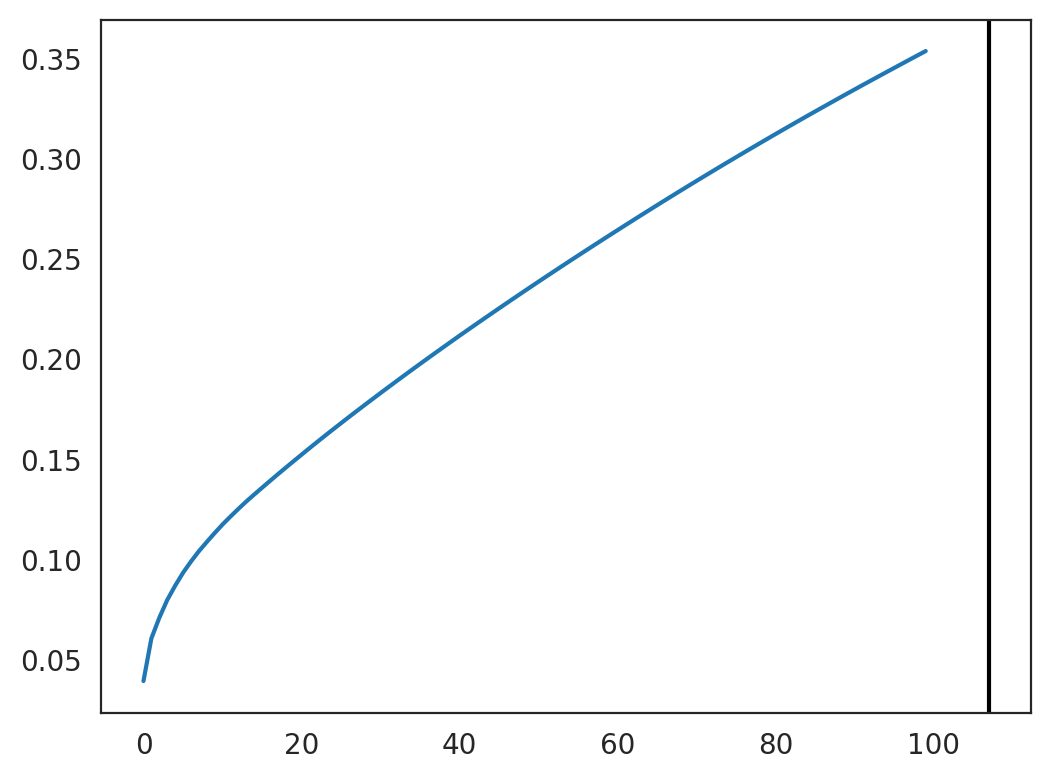

107


In [31]:
# Perform PCA
oracle.perform_PCA()

# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

In [32]:
n_cell = oracle.adata.shape[0]
print(f"cell number is :{n_cell}")

cell number is :21116


In [33]:
k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")

Auto-selected k is :527


In [34]:
oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=4)

In [35]:
# Save oracle object.
oracle.to_hdf5("./04_Skin_Fibroblast/celloracle/csv/select_gene_skin_fib.celloracle.oracle")

In [46]:
adata

AnnData object with n_obs × n_vars = 21116 × 2130
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2', 'palantir_pseudotime', 'macrostates_fwd', 'term_states_fwd', 'term_states_fwd_probs', 'init_states_fwd', 'init_states_fwd_probs', 'macrostates', 'clusters_gradients', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'T_

## GRN calculation

In [36]:
adata.obs['celltype_l2']

E13_HU1_BC0177_N02    Fib.Origin
E13_HU1_BC0227_N02    Fib.Muscle
E13_HU1_BC0232_N01    Fib.Muscle
E13_HU1_BC0253_N01     Fib.Upper
E13_HU1_BC0273_N03     Fib.Upper
                         ...    
E18_HX2_BC5406_N01     Fib.Lower
E18_HX2_BC5407_N02     Fib.Upper
E18_HX2_BC5507_N02     Fib.Lower
E18_HX2_BC5528_N01    Fib.Muscle
E18_HX2_BC5702_N02     Fib.Upper
Name: celltype_l2, Length: 21116, dtype: category
Categories (7, object): ['Fib.DC', 'Fib.Deep', 'Fib.Inter', 'Fib.Lower', 'Fib.Muscle', 'Fib.Origin', 'Fib.Upper']

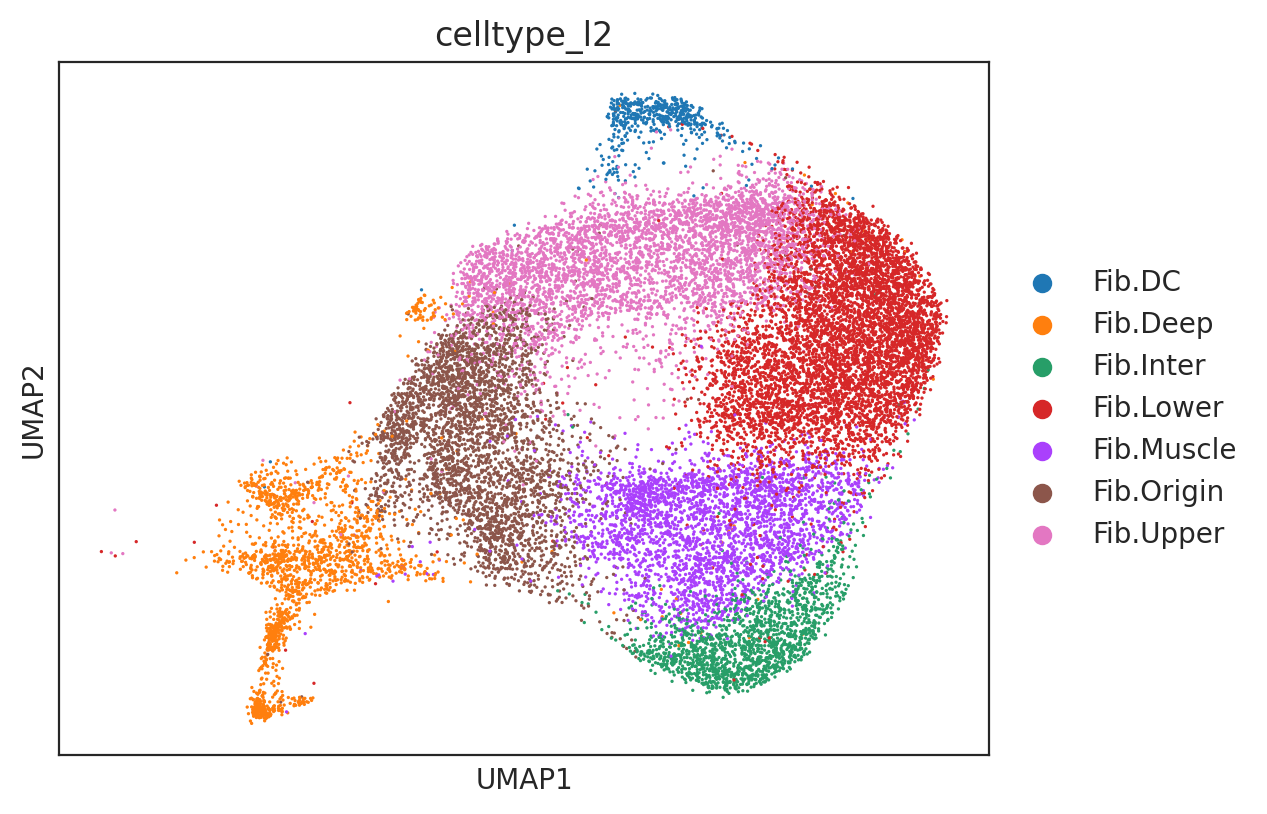

In [37]:
# Check clustering data
sc.pl.umap(oracle.adata, color="celltype_l2")

In [62]:
%%time
# Calculate GRN for each population in "louvain_annot" clustering unit.
# This step may take some time.(~30 minutes)
links = oracle.get_links(cluster_name_for_GRN_unit="celltype_l2", alpha=10,
                         verbose_level=10)

  0%|          | 0/7 [00:00<?, ?it/s]

Inferring GRN for Fib.DC...


  0%|          | 0/1064 [00:00<?, ?it/s]

OSError: [Errno 12] Cannot allocate memory

In [5]:
links = co.network_analysis.load_links('./04_Skin_Fibroblast/celloracle/csv/select_gene_links.celloracle.links')

In [6]:
links.links_dict.keys()

dict_keys(['Fib.DC', 'Fib.Deep', 'Fib.Inter', 'Fib.Lower', 'Fib.Muscle', 'Fib.Origin', 'Fib.Upper'])

In [10]:
links.links_dict["Fib.Deep"]

source         target  coef_mean  coef_abs             p     -logp
0       Nr3c2  0610039K10Rik  -0.000145  0.000145  9.821140e-06  5.007838
1        Klf4  0610039K10Rik   0.000978  0.000978  2.869351e-07  6.542216
2        Gli3  0610039K10Rik   0.000261  0.000261  2.797671e-07  6.553203
3        Rfx3  0610039K10Rik   0.000330  0.000330  4.002026e-07  6.397720
4       Mef2c  0610039K10Rik   0.000264  0.000264  8.267230e-03  2.082640
...       ...            ...        ...       ...           ...       ...
35118   Prdm1            Zyx  -0.003299  0.003299  9.747470e-07  6.011108
35119    Egr1            Zyx   0.001207  0.001207  3.614595e-03  2.441940
35120  Pou2f2            Zyx  -0.001344  0.001344  5.775322e-10  9.238424
35121   Nr4a2            Zyx  -0.002062  0.002062  7.704974e-08  7.113229
35122    Junb            Zyx   0.001644  0.001644  6.904011e-06  5.160899

[35123 rows x 6 columns]

In [11]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)

In [51]:
plt.rcParams["figure.figsize"] = [9, 4.5]

Fib.DC


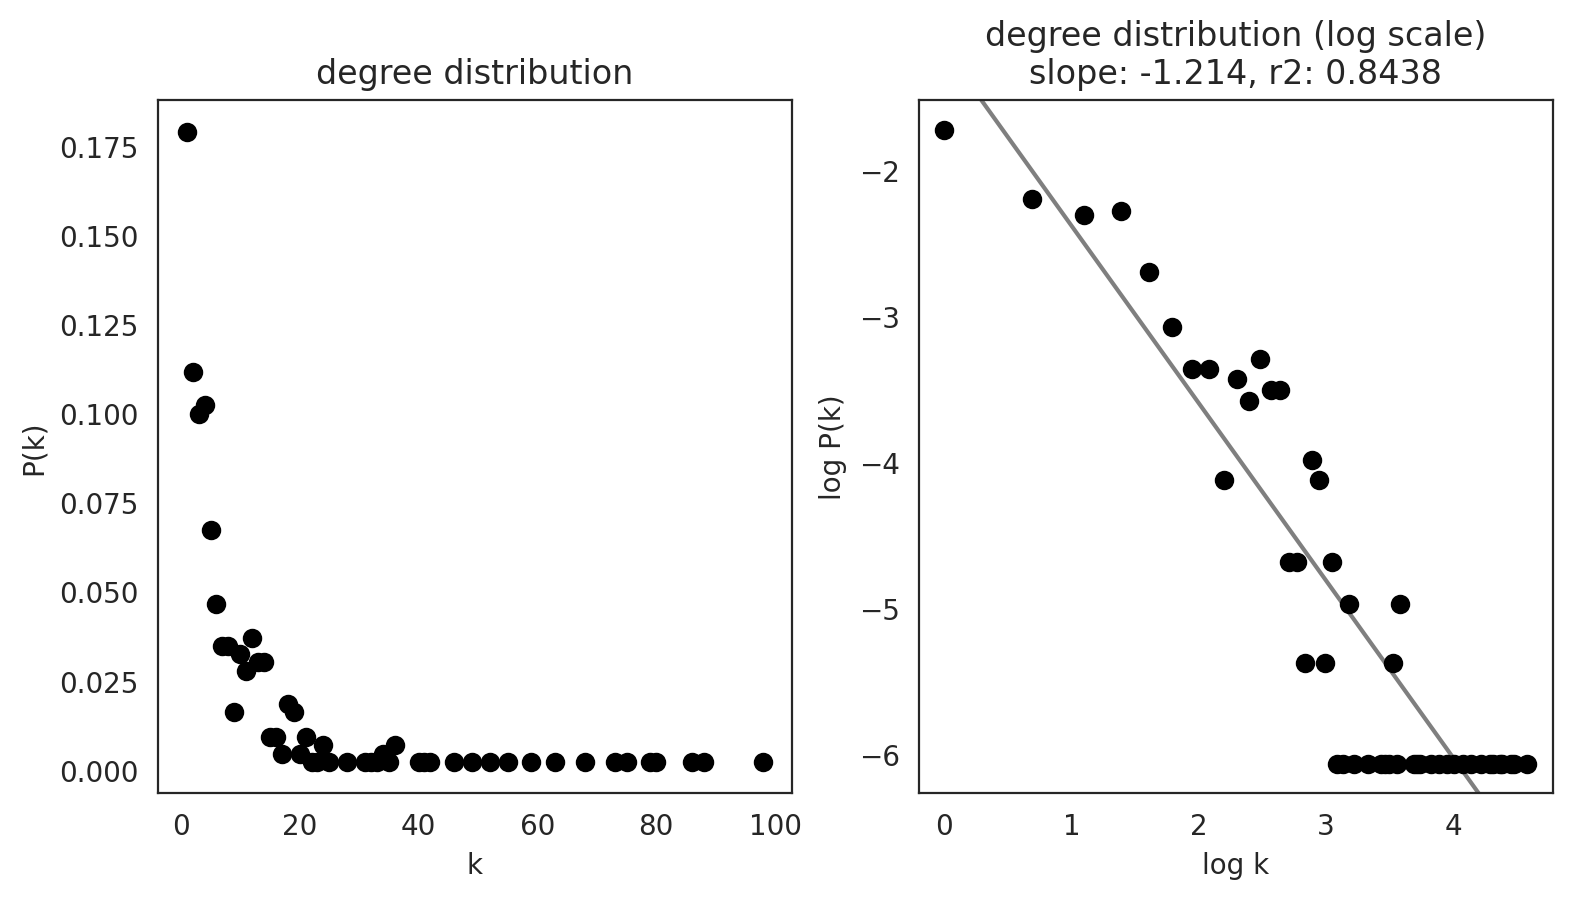

Fib.Deep


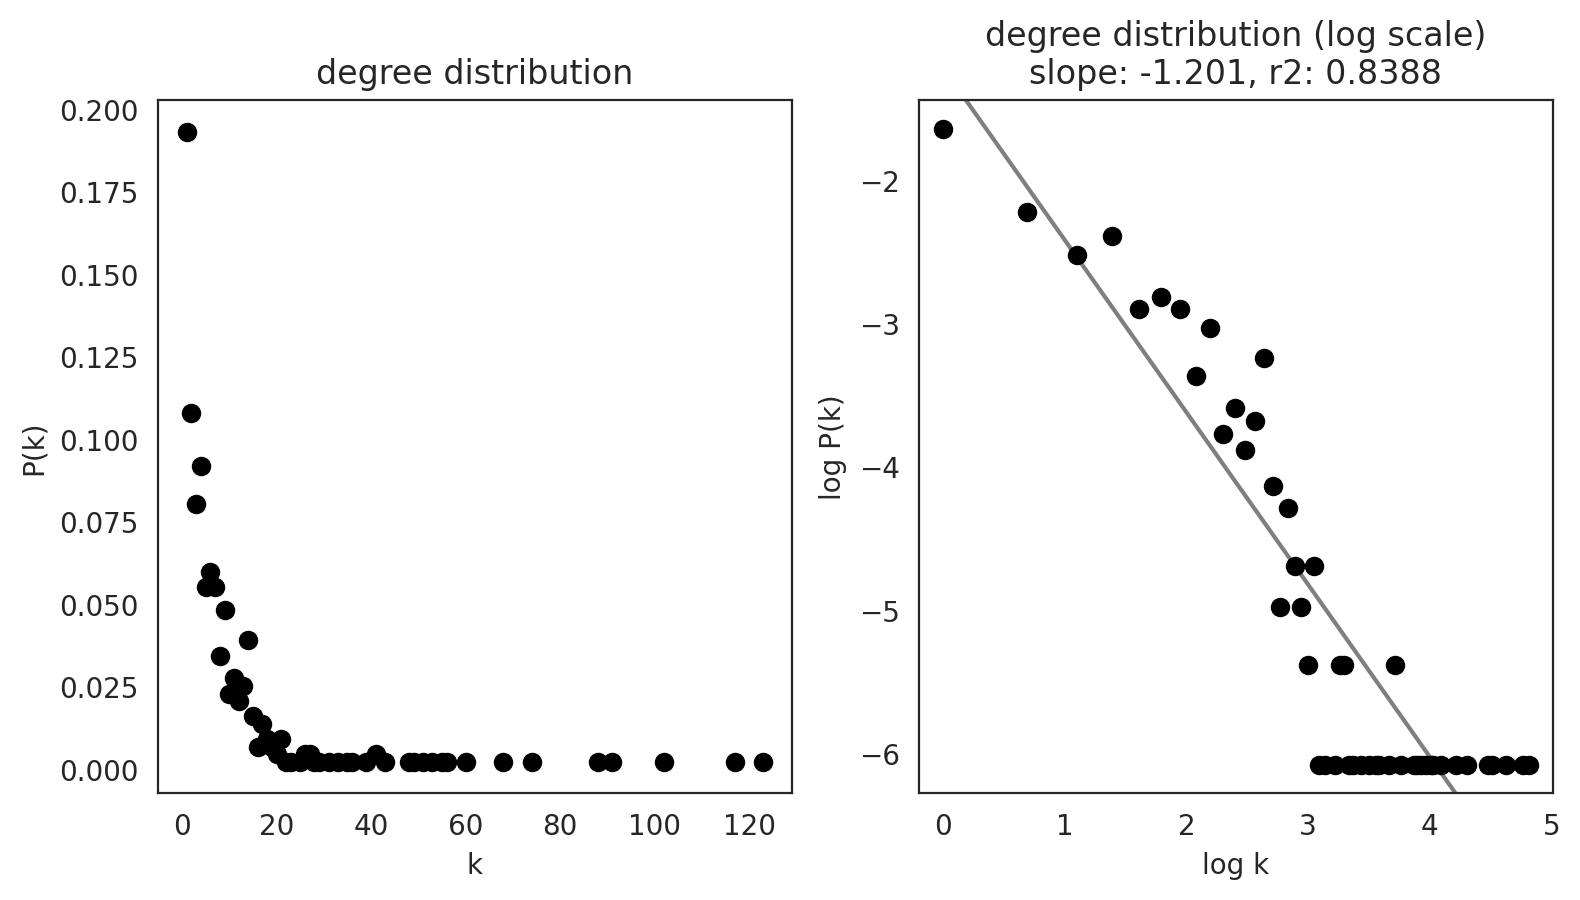

Fib.Inter


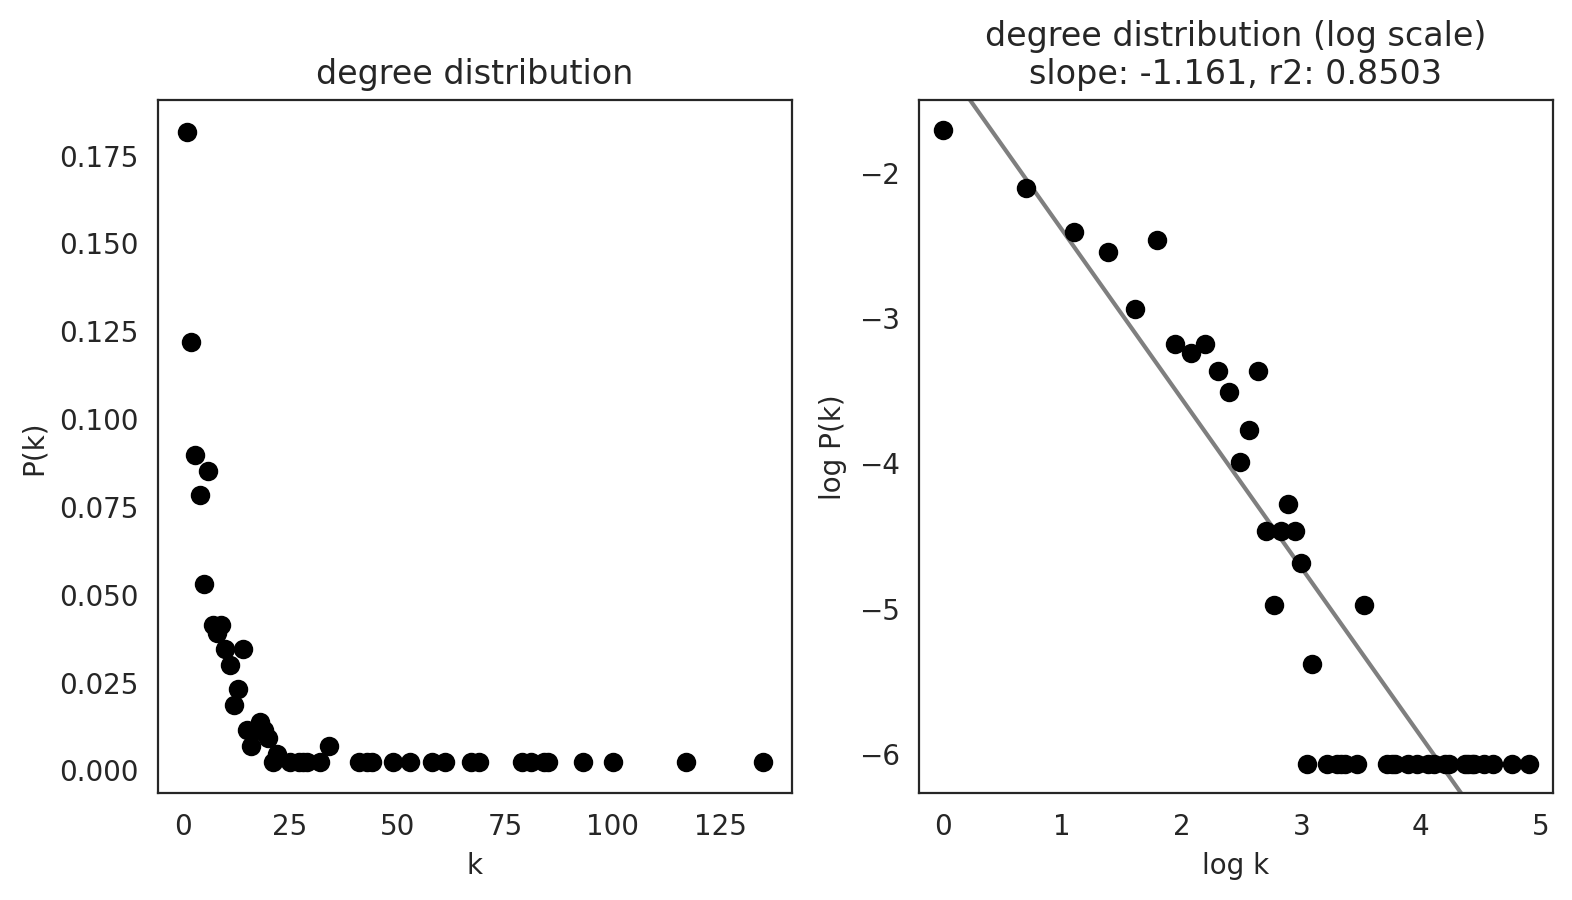

Fib.Lower


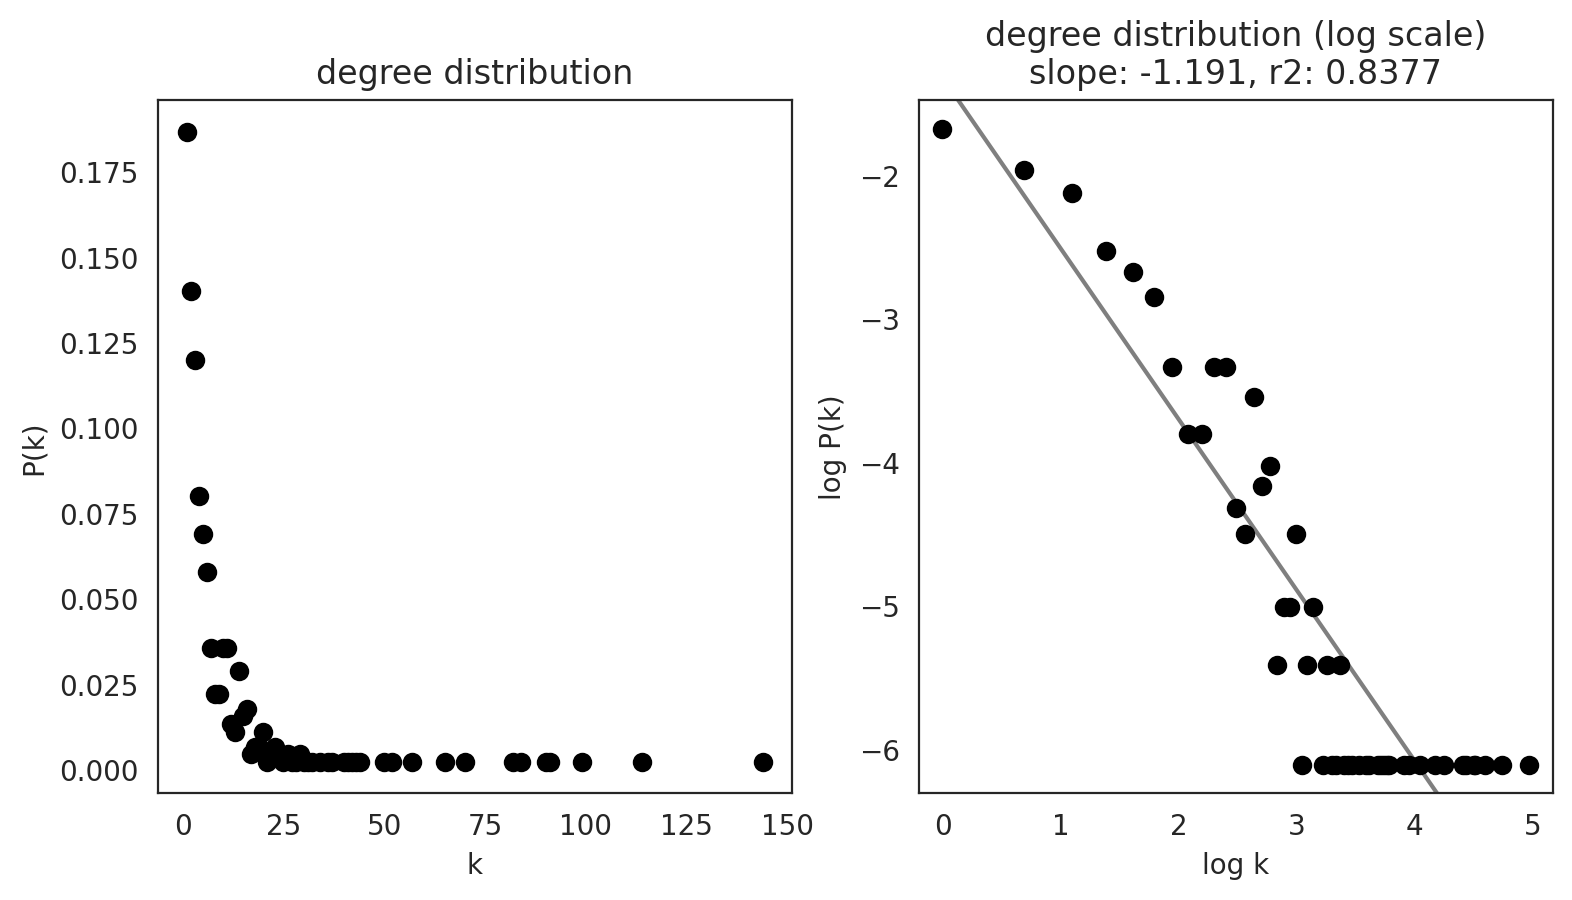

Fib.Muscle


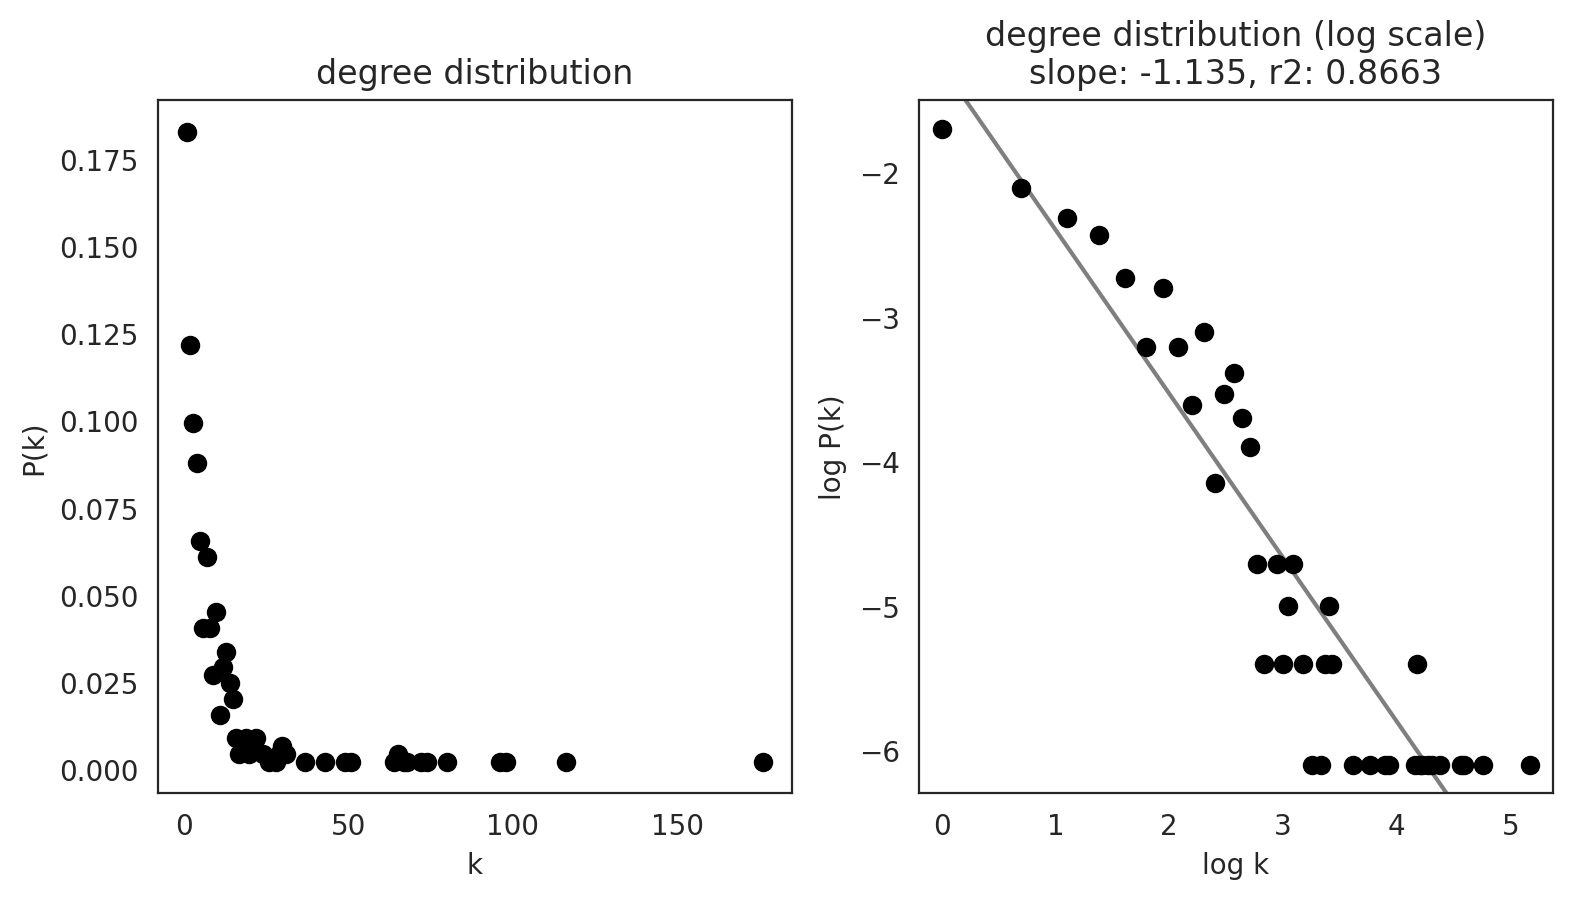

Fib.Origin


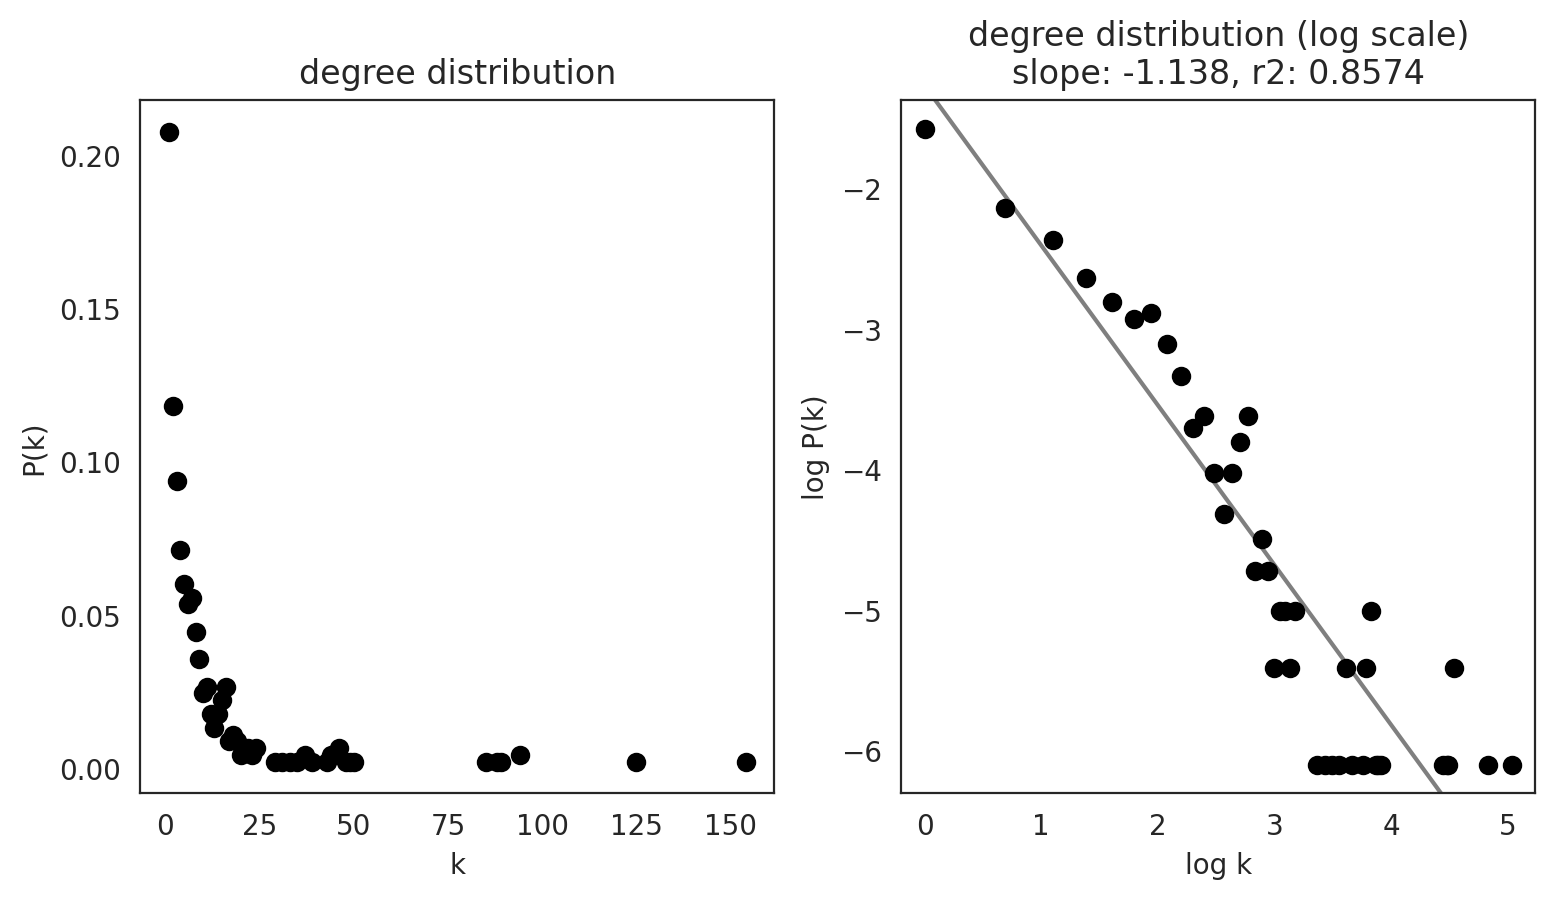

Fib.Upper


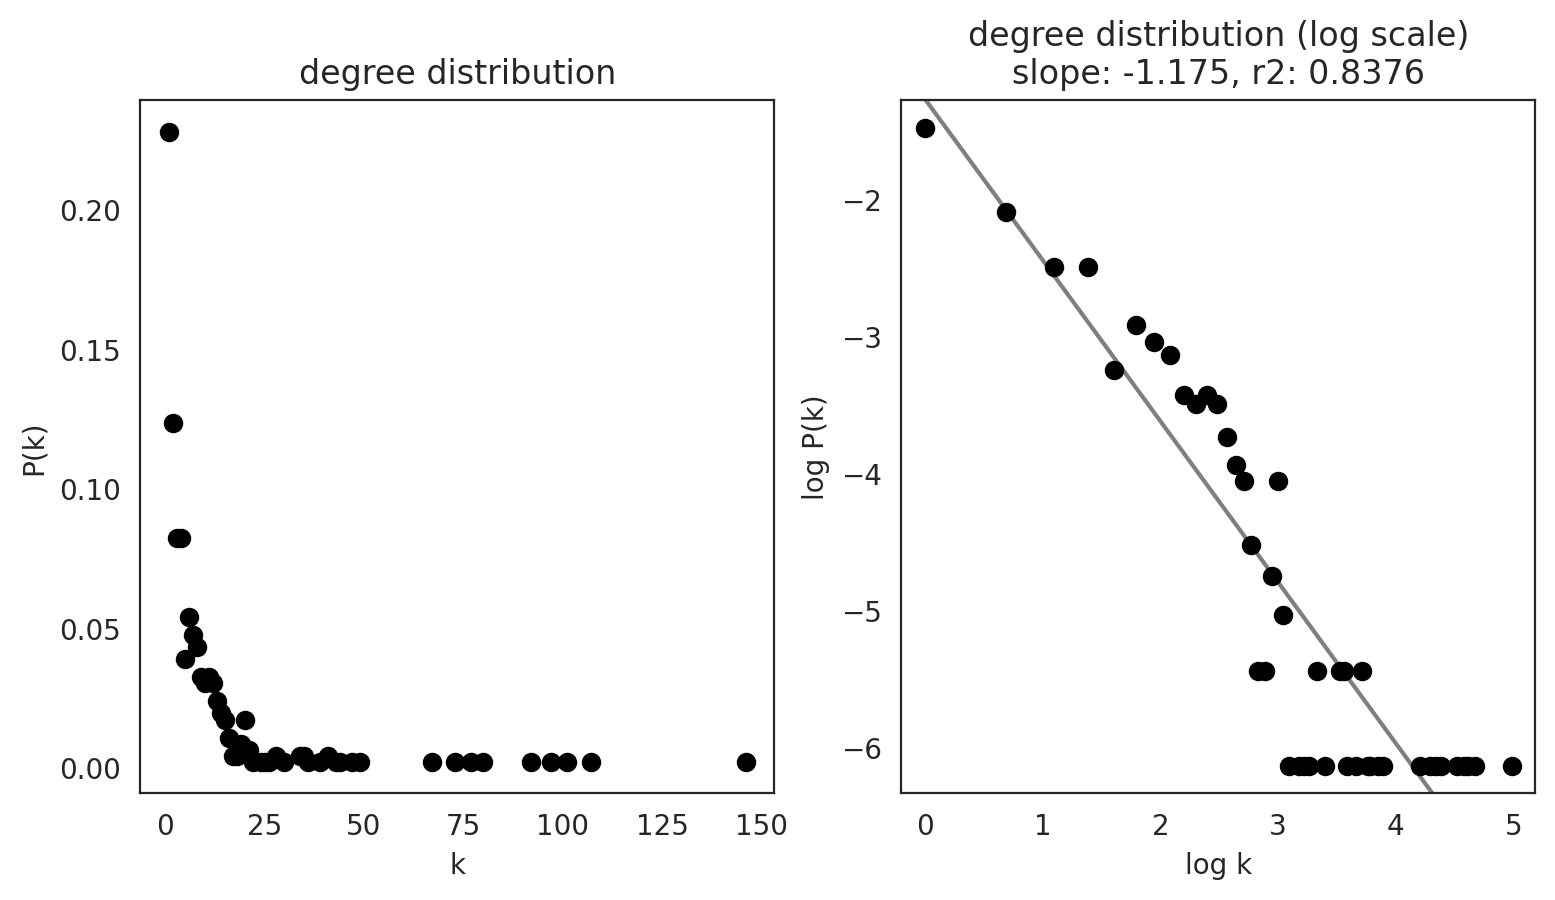

In [52]:
links.plot_degree_distributions(plot_model=True, 
                                               #save=f"{save_folder}/degree_distribution/",
                                               )

In [53]:
plt.rcParams["figure.figsize"] = [6, 4.5]

In [54]:
# Calculate network scores. 
links.get_network_score()

In [55]:
links.merged_score.head()

degree_all  degree_centrality_all  degree_in  degree_centrality_in  \
Npas3          34               0.079254         11              0.025641   
Krt1            5               0.011655          5              0.011655   
Egr1           90               0.209790          4              0.009324   
Krt10           3               0.006993          3              0.006993   
Foxa2          15               0.034965          0              0.000000   

       degree_out  degree_centrality_out  betweenness_centrality  \
Npas3          23               0.053613                   821.0   
Krt1            0               0.000000                     0.0   
Egr1           86               0.200466                  1292.0   
Krt10           0               0.000000                     0.0   
Foxa2          15               0.034965                     0.0   

       eigenvector_centrality cluster  
Npas3                0.724899  Fib.DC  
Krt1                 0.349732  Fib.DC  
Egr1                 0.847719  Fib.DC  
Krt10                0.313536  Fib.DC  
Foxa2                0.161013  Fib.DC

In [56]:
# Save Links object.
links.to_hdf5(file_path="./04_Skin_Fibroblast/celloracle/csv/select_gene_skin_fib_links.celloracle.links")
# You can load files with the following command.
#links = co.load_hdf5(file_path="./04_Skin_Fibroblast/celloracle/csv/skin_fib_links.celloracle.links")

In [17]:
links = co.load_hdf5("./04_Skin_Fibroblast/celloracle/csv/select_gene_skin_fib_links.celloracle.links")
links

In [18]:
links.merged_score

degree_all  degree_centrality_all  degree_in  degree_centrality_in  \
Npas3           34               0.079254         11              0.025641   
Krt1             5               0.011655          5              0.011655   
Egr1            90               0.209790          4              0.009324   
Krt10            3               0.006993          3              0.006993   
Foxa2           15               0.034965          0              0.000000   
...            ...                    ...        ...                   ...   
Ugdh             1               0.002174          1              0.002174   
Ngfr             1               0.002174          1              0.002174   
Hecw1            1               0.002174          1              0.002174   
Olfml3           1               0.002174          1              0.002174   
Inhbb            1               0.002174          1              0.002174   

        degree_out  degree_centrality_out  betweenness_centrality  \
Npas3           23               0.053613                   821.0   
Krt1             0               0.000000                     0.0   
Egr1            86               0.200466                  1292.0   
Krt10            0               0.000000                     0.0   
Foxa2           15               0.034965                     0.0   
...            ...                    ...                     ...   
Ugdh             0               0.000000                     0.0   
Ngfr             0               0.000000                     0.0   
Hecw1            0               0.000000                     0.0   
Olfml3           0               0.000000                     0.0   
Inhbb            0               0.000000                     0.0   

        eigenvector_centrality    cluster  
Npas3                 0.724899     Fib.DC  
Krt1                  0.349732     Fib.DC  
Egr1                  0.847719     Fib.DC  
Krt10                 0.313536     Fib.DC  
Foxa2                 0.161013     Fib.DC  
...                        ...        ...  
Ugdh                  0.012503  Fib.Upper  
Ngfr                  0.010832  Fib.Upper  
Hecw1                 0.008095  Fib.Upper  
Olfml3                0.016962  Fib.Upper  
Inhbb                 0.016924  Fib.Upper  

[3102 rows x 9 columns]

In [19]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)

In [20]:
links.filtered_links['Fib.Origin']

source    target  coef_mean  coef_abs             p      -logp
16272   Egr1     Krt10   0.282650  0.282650  5.943899e-22  21.225929
14424   Egr1  Il1rapl1  -0.249344  0.249344  1.886860e-14  13.724260
10341   Egr1     Flrt2  -0.244408  0.244408  5.736832e-08   7.241328
10344  Prdm1     Flrt2  -0.230701  0.230701  2.793457e-10   9.553858
23223  Ovol1     Postn   0.225429  0.225429  9.670260e-14  13.014562
...      ...       ...        ...       ...           ...        ...
24453   Zeb1       Ptn   0.020989  0.020989  4.891022e-10   9.310600
30248   Klf8      Tcf4   0.020988  0.020988  9.500988e-10   9.022231
12980   Egr1     Grid2  -0.020981  0.020981  2.135601e-06   5.670480
24310    Fos     Ptch1   0.020979  0.020979  7.756351e-14  13.110343
28033   Klf5   Slitrk6  -0.020973  0.020973  2.177203e-13  12.662101

[2000 rows x 6 columns]

In [21]:
df = links.filtered_links['Fib.Origin']
df

source    target  coef_mean  coef_abs             p      -logp
16272   Egr1     Krt10   0.282650  0.282650  5.943899e-22  21.225929
14424   Egr1  Il1rapl1  -0.249344  0.249344  1.886860e-14  13.724260
10341   Egr1     Flrt2  -0.244408  0.244408  5.736832e-08   7.241328
10344  Prdm1     Flrt2  -0.230701  0.230701  2.793457e-10   9.553858
23223  Ovol1     Postn   0.225429  0.225429  9.670260e-14  13.014562
...      ...       ...        ...       ...           ...        ...
24453   Zeb1       Ptn   0.020989  0.020989  4.891022e-10   9.310600
30248   Klf8      Tcf4   0.020988  0.020988  9.500988e-10   9.022231
12980   Egr1     Grid2  -0.020981  0.020981  2.135601e-06   5.670480
24310    Fos     Ptch1   0.020979  0.020979  7.756351e-14  13.110343
28033   Klf5   Slitrk6  -0.020973  0.020973  2.177203e-13  12.662101

[2000 rows x 6 columns]

In [22]:
df.to_csv('./04_Skin_Fibroblast/celloracle/csv/origin_links.csv',index=False)

In [12]:
tf_list = ['Sox11','Foxp2','Sp3','Zkscan2','Meis2','Tgif2','Zfp69','Zbtb37','Arnt2','Pax1','Arid5b','Zic1','Zic3','Twist1','Pou3f3','Meis1','Zic4','Lef1','Tcf7l1','Tcf12','Zbtb18','Prrx1','Lmx1b','Zfp281','Hmg20a','Tfcp2']

In [13]:
filtered = df[df['source'].isin(tf_list)]
filtered

source  target  coef_mean  coef_abs             p      -logp
17324   Zic1   Lrrc7   0.160366  0.160366  2.812316e-20  19.550936
23221  Tcf12   Postn  -0.152436  0.152436  1.066071e-18  17.972214
13706  Foxp2   Hmcn1   0.113175  0.113175  2.628001e-11  10.580374
17348   Zic4   Lrrc7  -0.096119  0.096119  1.545252e-15  14.811001
12687   Zic1    Gpc6  -0.088112  0.088112  7.030248e-12  11.153029
...      ...     ...        ...       ...           ...        ...
30286  Tcf12  Tcf7l1   0.021428  0.021428  7.272259e-10   9.138331
5364     Sp3    Cdh2  -0.021353  0.021353  5.296170e-15  14.276038
21567   Zic1    Pak7   0.021230  0.021230  2.258090e-07   6.646259
30373  Tcf12   Tead1   0.021181  0.021181  3.833627e-10   9.416390
20994    Sp3     Ntm   0.021009  0.021009  9.392943e-10   9.027198

[248 rows x 6 columns]

In [14]:
filtered.to_csv('./04_Skin_Fibroblast/celloracle/csv/origin_links.csv',index=False)

# In silico gene perturbation with GRNs

In [1]:
import os
import sys

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [7]:
import sys
sys.path.append('./04_Skin_Fibroblast/software_packages/')
import celloracle as co
co.__version__

'0.18.0'

In [8]:
#plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [6,6]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 600

%matplotlib inline

In [9]:
# Load the tutorial oracle object. 
# Attention!! Please use the function below when you use your data. 
oracle = co.load_hdf5("./04_Skin_Fibroblast/celloracle/csv/select_gene_skin_fib.celloracle.oracle")
oracle

Oracle object

Meta data
    celloracle version used for instantiation: 0.18.0
    n_cells: 21116
    n_genes: 2130
    cluster_name: celltype_l2
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 15828 genes
    n_regulatory_in_TFdict: 1090 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 187 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 1170 genes
    k_for_knn_imputation: 527
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Not finished

In [10]:
oracle.adata

AnnData object with n_obs × n_vars = 21116 × 2130
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2', 'palantir_pseudotime', 'macrostates_fwd', 'term_states_fwd', 'term_states_fwd_probs', 'init_states_fwd', 'init_states_fwd_probs', 'macrostates', 'clusters_gradients', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', '

In [ ]:
# Here, we load demo links object for the training purpose.
# Attention!! Please use the function below when you use your data.
links = co.load_hdf5("./04_Skin_Fibroblast/celloracle/csv/select_gene_skin_fib_links.celloracle.links")
links

In [ ]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(alpha=10, 
                              use_cluster_specific_TFdict=True)

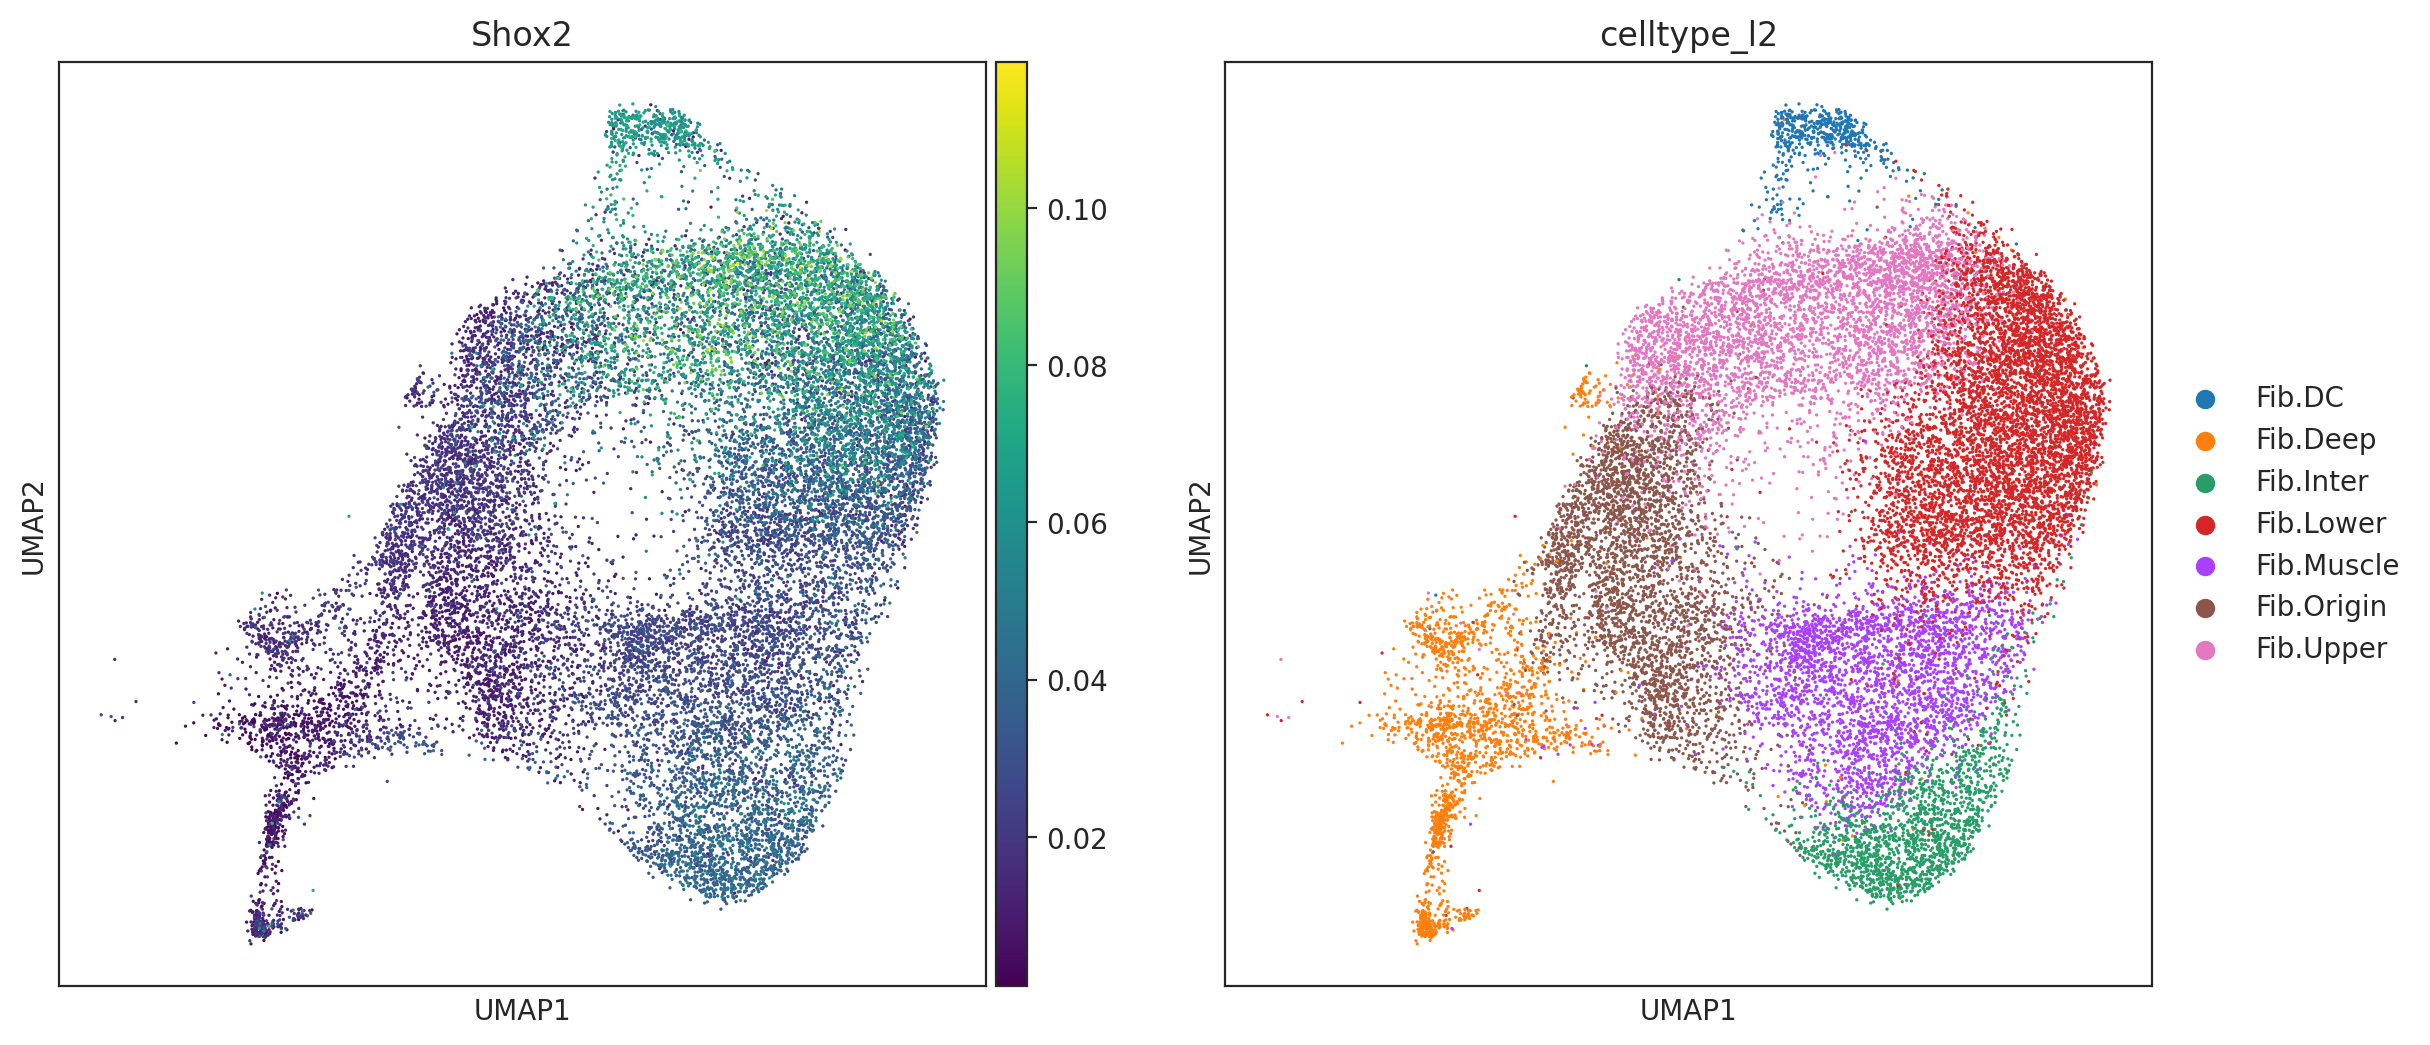

In [7]:
# Check gene expression 
goi = "Shox2"
sc.pl.umap(oracle.adata, color=[goi, oracle.cluster_column_name],
                 layer="imputed_count", use_raw=False, cmap="viridis")

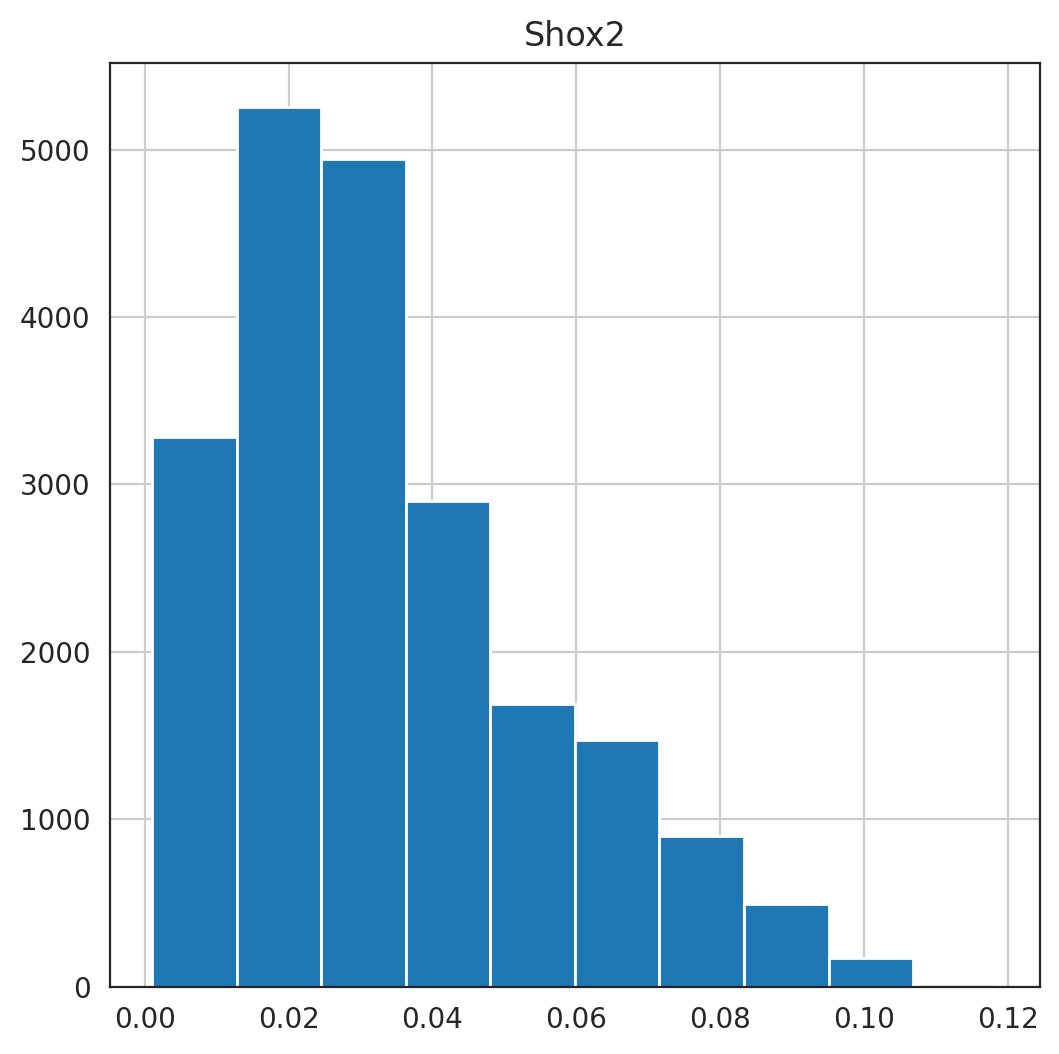

In [32]:
# Plot gene expression in histogram
sc.get.obs_df(oracle.adata, keys=[goi], layer="imputed_count").hist()
plt.show()

In [33]:
# Enter perturbation conditions to simulate signal propagation after the perturbation.
oracle.simulate_shift(perturb_condition={goi: 0.0},
                      n_propagation=3)

In [36]:
oracle.adata

AnnData object with n_obs × n_vars = 21116 × 2130
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2', 'palantir_pseudotime', 'macrostates_fwd', 'term_states_fwd', 'term_states_fwd_probs', 'init_states_fwd', 'init_states_fwd_probs', 'macrostates', 'clusters_gradients', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', '

In [38]:
# Save oracle object.
oracle.to_hdf5("./04_Skin_Fibroblast/celloracle/csv/before_transitionprob_skin_fib.celloracle.oracle")

In [17]:
oracle = co.load_hdf5("./04_Skin_Fibroblast/celloracle/csv/after_transitionprob_skin_fib.celloracle.oracle")
oracle

Oracle object

Meta data
    celloracle version used for instantiation: 0.18.0
    n_cells: 21116
    n_genes: 2130
    cluster_name: celltype_l2
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 15828 genes
    n_regulatory_in_TFdict: 1090 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 187 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 1170 genes
    k_for_knn_imputation: 527
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Done

In [19]:
oracle.adata

AnnData object with n_obs × n_vars = 21116 × 2130
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2', 'palantir_pseudotime', 'macrostates_fwd', 'term_states_fwd', 'term_states_fwd_probs', 'init_states_fwd', 'init_states_fwd_probs', 'macrostates', 'clusters_gradients', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', '

In [22]:
from celloracle.applications import Gradient_calculator

# Instantiate Gradient calculator object
gradient = Gradient_calculator(oracle_object=oracle, pseudotime_key="palantir_pseudotime")

In [ ]:
# Calculate graddient
gradient.calculate_gradient()

In [29]:
# Save gradient object if you want.
gradient.to_hdf5("./04_Skin_Fibroblast/celloracle/csv/select_gene_skin_fib.celloracle.gradient")

# Systematic_KO_simulations_PS_compute

In [2]:
import sys
sys.path.append('./04_Skin_Fibroblast/software_packages/')

In [3]:
import copy
import glob
import importlib
import time
import os
import shutil
import sys
from importlib import reload

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from tqdm.notebook import tqdm

#import time

In [ ]:
import celloracle as co
from celloracle.applications import Oracle_development_module, Oracle_systematic_analysis_helper
co.__version__

In [5]:
#plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [5,5]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['pdf.fonttype']=42

%matplotlib inline

In [37]:
oracle = co.load_hdf5("./04_Skin_Fibroblast/celloracle/csv/select_gene_skin_fib.celloracle.oracle")
links = co.network_analysis.load_links('./04_Skin_Fibroblast/celloracle/csv/select_gene_links.celloracle.links')
gradient = co.load_hdf5("./04_Skin_Fibroblast/celloracle/csv/select_gene_skin_fib.celloracle.gradient")

# Please make sure that the number of cells and dimensional reduction data is exact same between oracle object and gradient object
print(oracle.adata.shape, gradient.embedding.shape)

assert((oracle.adata.obsm[oracle.embedding_name] == gradient.embedding).all())

(21116, 2130) (21116, 2)


In [50]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(alpha=10, use_cluster_specific_TFdict=True)

  0%|          | 0/7 [00:00<?, ?it/s]

In [52]:
# You can get the list of genes that have at least one regulatory connection in the inferred GRNs.
genes = oracle.active_regulatory_genes
len(genes)

181

In [56]:
df = pd.DataFrame(genes, columns=['Gene'])
df.to_csv("./04_Skin_Fibroblast/celloracle/csv/tf1.csv",index=False)

In [8]:
# List of cluster name
sorted(list(oracle.adata.obs["celltype_l2"].unique()))

['Fib.DC',
 'Fib.Deep',
 'Fib.Inter',
 'Fib.Lower',
 'Fib.Muscle',
 'Fib.Origin',
 'Fib.Upper']

In [9]:
# Get cell_id in celltype
clusters = ['Fib.DC', 'Fib.Deep', 'Fib.Inter', 'Fib.Lower', 'Fib.Muscle', 'Fib.Origin', 'Fib.Upper']

cell_idx_DC = np.where(oracle.adata.obs["celltype_l2"]==clusters[0,1,2])[0]

cell_idx_upper = np.where(oracle.adata.obs["celltype_l2"]==clusters[6])[0]

cell_idx_inter = np.where(oracle.adata.obs["celltype_l2"]==clusters[2])[0]

cell_idx_lower = np.where(oracle.adata.obs["celltype_l2"]==clusters[3])[0]

cell_idx_deep = np.where(oracle.adata.obs["celltype_l2"]==clusters[1])[0]

cell_idx_origin = np.where(oracle.adata.obs["celltype_l2"]==clusters[5])[0]

cell_idx_muscle = np.where(oracle.adata.obs["celltype_l2"]==clusters[4])[0]

In [47]:
# Get cell_id in lineage
clusters = ['Fib.DC', 'Fib.Deep', 'Fib.Inter', 'Fib.Lower', 'Fib.Muscle', 'Fib.Origin', 'Fib.Upper']
cell_idx_lineage_DC = np.where(oracle.adata.obs["celltype_l2"].isin(["Fib.Origin","Fib.Upper","Fib.DC"]))[0]
cell_idx_lineage_Deep = np.where(oracle.adata.obs["celltype_l2"].isin(["Fib.Origin","Fib.Deep"]))[0]
cell_idx_lineage_Inter = np.where(oracle.adata.obs["celltype_l2"].isin(["Fib.Origin","Fib.Muscle","Fib.Inter"]))[0]
cell_idx_lineage_Lower = np.where(oracle.adata.obs["celltype_l2"].isin(["Fib.Origin","Fib.Lower"]))[0]

In [46]:
len(cell_idx_lineage_DC)

8369

In [10]:
# Make dictionary to store the cell index list

index_dictionary = {"Whole_cells": None,
                    "Fib.DC": cell_idx_DC,
                    "Fib.upper": cell_idx_upper,
                    "Fib.Muscle": cell_idx_muscle,
                    "Fib.Lower": cell_idx_lower,
                    "Fib.Inter": cell_idx_inter,
                    "Fib.Origin": cell_idx_origin,
                     }

In [27]:
cell_idx_lineage_DC = np.where(oracle.adata.obs_names)[0]
cell_idx_lineage_Deep = np.where(oracle.adata.obs_names)[0]
cell_idx_lineage_Inter = np.where(oracle.adata.obs_names)[0]
cell_idx_lineage_Lower = np.where(oracle.adata.obs_names)[0]

21116

In [ ]:
# Make dictionary to store the cell index list

index_dictionary = {"Whole_cells": None,
                    "lineage_Fib.DC": cell_idx_DC,
                    "lineage_Fib.Lower": cell_idx_lower,
                    "lineage_Fib.Inter": cell_idx_inter,
                    "lineage_Fib.Deep": cell_idx_deep
                     }

In [25]:
oracle.adata.obs_names

Index(['E13_HU1_BC0177_N02', 'E13_HU1_BC0227_N02', 'E13_HU1_BC0232_N01',
       'E13_HU1_BC0253_N01', 'E13_HU1_BC0273_N03', 'E13_HU1_BC0276_N02',
       'E13_HU1_BC0311_N01', 'E13_HU1_BC0325_N02', 'E13_HU1_BC0333_N01',
       'E13_HU1_BC0341_N03',
       ...
       'E18_HX2_BC5228_N01', 'E18_HX2_BC5231_N01', 'E18_HX2_BC5242_N02',
       'E18_HX2_BC5256_N02', 'E18_HX2_BC5353_N02', 'E18_HX2_BC5406_N01',
       'E18_HX2_BC5407_N02', 'E18_HX2_BC5507_N02', 'E18_HX2_BC5528_N01',
       'E18_HX2_BC5702_N02'],
      dtype='object', length=21116)

In [11]:
# 0. Define parameters
n_propagation = 3
n_neighbors=200

file_path = "./04_Skin_Fibroblast/celloracle/csv/circulate_skin_fib.celloracle.hdf5" # Please use .hdf5 for extension.


def pipeline(gene_for_KO):
     
    # 1. Simulate KO
    oracle.simulate_shift(perturb_condition={gene_for_KO: 0},
                                 ignore_warning=True,
                                 n_propagation=3)
    oracle.estimate_transition_prob(n_neighbors=n_neighbors, knn_random=True, sampled_fraction=1)
    oracle.calculate_embedding_shift(sigma_corr=0.05)

    # Do simulation for all conditions.
    for lineage_name, cell_idx in index_dictionary.items():
        
        dev = Oracle_development_module()
        # Load development flow
        dev.load_differentiation_reference_data(gradient_object=gradient)
        # Load simulation result
        dev.load_perturb_simulation_data(oracle_object=oracle, cell_idx_use=cell_idx, name=lineage_name)
        # Calculate inner product
        dev.calculate_inner_product()
        dev.calculate_digitized_ip(n_bins=10)
        
        # Save results in a hdf5 file.
        dev.set_hdf_path(path=file_path) 
        dev.dump_hdf5(gene=gene_for_KO, misc=lineage_name)
        

In [ ]:
%%time
# Test pipeline with Gata1 gene
pipeline(gene_for_KO="Sox9")

In [6]:
# Make Oracle development module class to load data
file_path = "./04_Skin_Fibroblast/celloracle/csv/circulate_cluster_skin_fib.celloracle.hdf5"
dev = Oracle_development_module()
dev.set_hdf_path(path=file_path)

In [7]:
# If we use the function below, we can see information of the saved data
info = dev.get_hdf5_info()

print("Genes\n", info["gene_list"])

print("\nSimulation conditions\n", info["misc_list"])

Genes
 ['Aire' 'Alx4' 'Ar' 'Arid5b' 'Arnt2' 'Ascl1' 'Atf1' 'Atf3' 'Atoh8' 'Bach2'
 'Barx2' 'Bhlhe22' 'Cdx2' 'Cdx4' 'Dmrt1' 'Dmrtb1' 'Ebf1' 'Ebf3' 'Egr1'
 'Egr3' 'En1' 'Eomes' 'Erf' 'Esr1' 'Esr2' 'Etv5' 'Ferd3l' 'Fezf1' 'Fos'
 'Fosb' 'Fosl2' 'Foxa1' 'Foxa2' 'Foxc1' 'Foxc2' 'Foxd1' 'Foxd2' 'Foxh1'
 'Foxk1' 'Foxl1' 'Foxp2' 'Foxs1' 'Gli1' 'Gli2' 'Gli3' 'Glis1' 'Glis3'
 'Hand2' 'Hes7' 'Hlf' 'Hnf1a' 'Hoxa10' 'Hoxa9' 'Hoxb8' 'Hoxc11' 'Hoxc5'
 'Hoxc9' 'Hoxd11' 'Irf4' 'Jun' 'Junb' 'Jund' 'Klf10' 'Klf12' 'Klf3' 'Klf4'
 'Klf5' 'Klf8' 'Klf9' 'Lbx2' 'Lef1' 'Lhx2' 'Lhx6' 'Lmx1b' 'Maf' 'Mecom'
 'Mef2b' 'Mef2c' 'Mef2d' 'Meis1' 'Meis2' 'Meox1' 'Msx1' 'Mybl1' 'Myf5'
 'Myod1' 'Neurod4' 'Nfatc1' 'Nfatc2' 'Nfe2l2' 'Nfia' 'Nfib' 'Nfix' 'Nfkb1'
 'Nfkb2' 'Nhlh2' 'Nkx6-3' 'Npas3' 'Nr1h5' 'Nr3c2' 'Nr4a2' 'Nrl' 'Onecut1'
 'Onecut3' 'Osr1' 'Osr2' 'Ovol1' 'Pax1' 'Pax2' 'Pax8' 'Pitx1' 'Plagl1'
 'Pou2f2' 'Pou3f3' 'Ppara' 'Ppard' 'Pparg' 'Prdm1' 'Prdm14' 'Prdm16'
 'Prrx1' 'Prrx2' 'Rbpj' 'Rel' 'Rela' 'Relb' 'Rfx3' 'Rf

2024-07-02 22:13:07,745 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-02 22:13:07,753 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


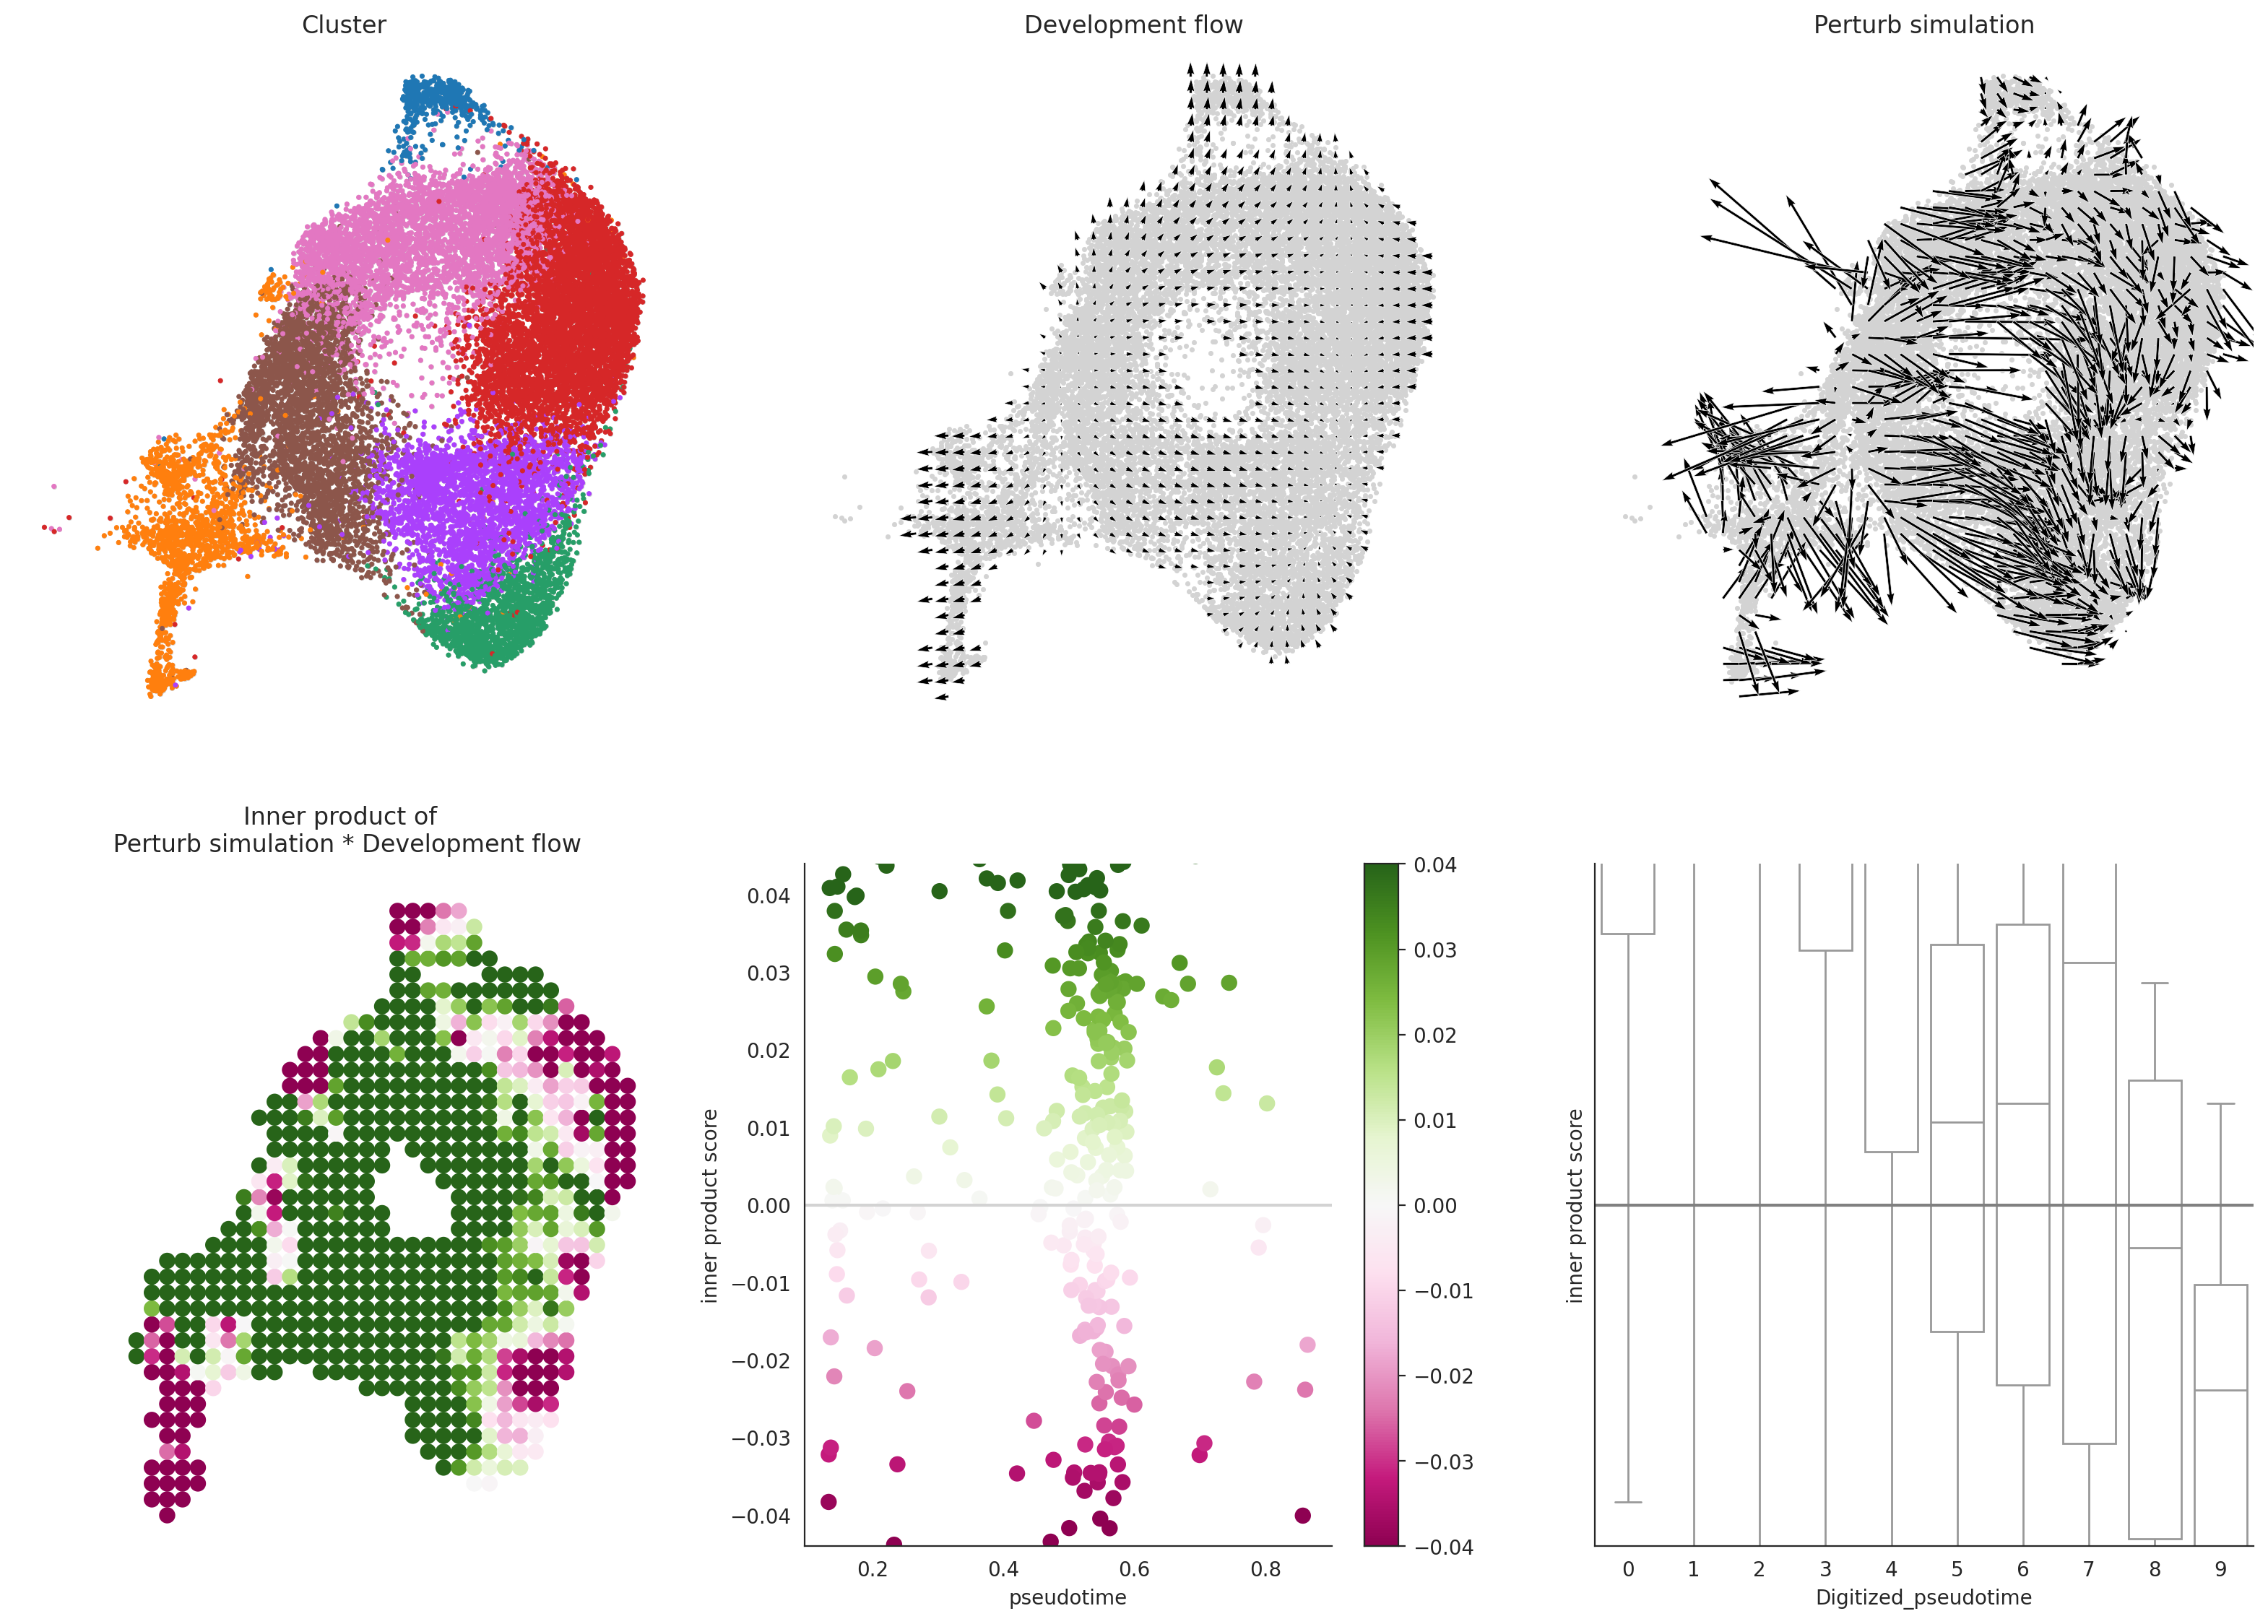

In [116]:
# Load one results
dev.load_hdf5(gene="Zic4",misc="Whole_cells")

# Visualize result
dev.visualize_development_module_layout_0(s=5, scale_for_simulation=2.5, s_grid=50,
                                          scale_for_pseudotime=50, vm=0.04)

### Systematic analysis using Interactive UI

In [8]:
# Load data with Oracle_systematic_analysis_helper.
helper = Oracle_systematic_analysis_helper(hdf5_file_path=file_path)

In [ ]:
helper.interactive_sort_TFs_by_neagative_ip()

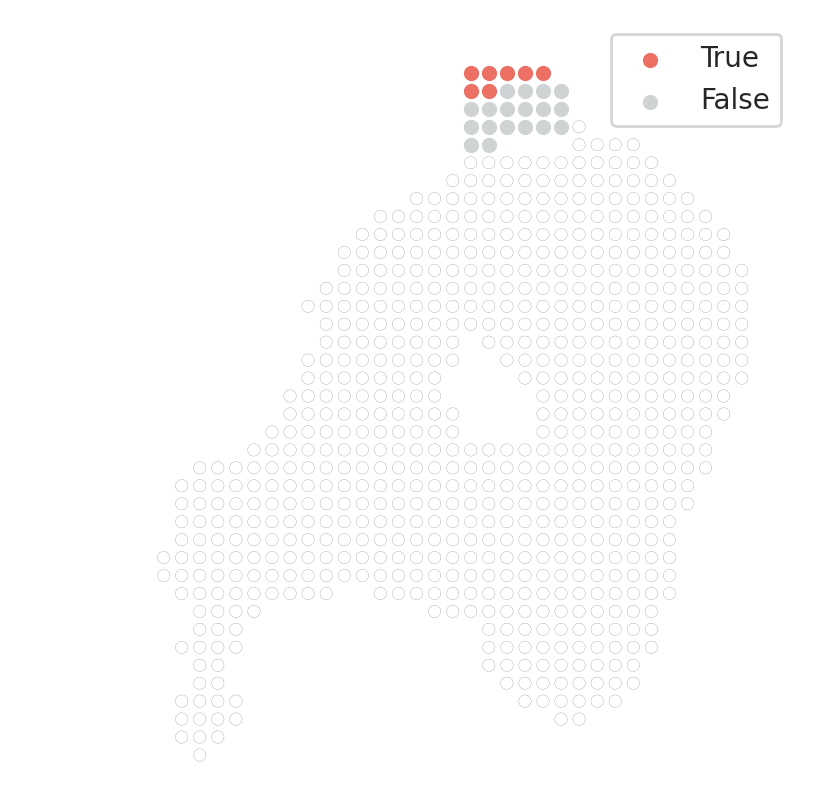

In [21]:
dev.plot_selected_pseudotime_on_grid(pseudotime_selected=[6,9])

In [16]:
ps = helper.calculate_negative_ps_p_value(misc="Fib.DC")# method2 for select gene

  0%|          | 0/181 [00:00<?, ?it/s]

In [10]:
## Make plot like fig1 f

ps_me = helper.calculate_negative_ps_p_value(misc="Fib.DC")
ps_gm = helper.calculate_negative_ps_p_value(misc="Fib.Origin")

ps_me.ps_sum = np.log1p(ps_me.ps_sum) # Log transform
ps_gm.ps_sum = np.log1p(ps_gm.ps_sum) # Log transform

ps_me = ps_me.rename(columns={"ps_sum": "ps_sum_me"})
ps_gm = ps_gm.rename(columns={"ps_sum": "ps_sum_gm"})

ps_merged = pd.merge(ps_me, ps_gm, on="gene")

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

In [11]:
ps_merged.to_csv("./04_Skin_Fibroblast/celloracle/csv/TF_DC_Origin.csv")

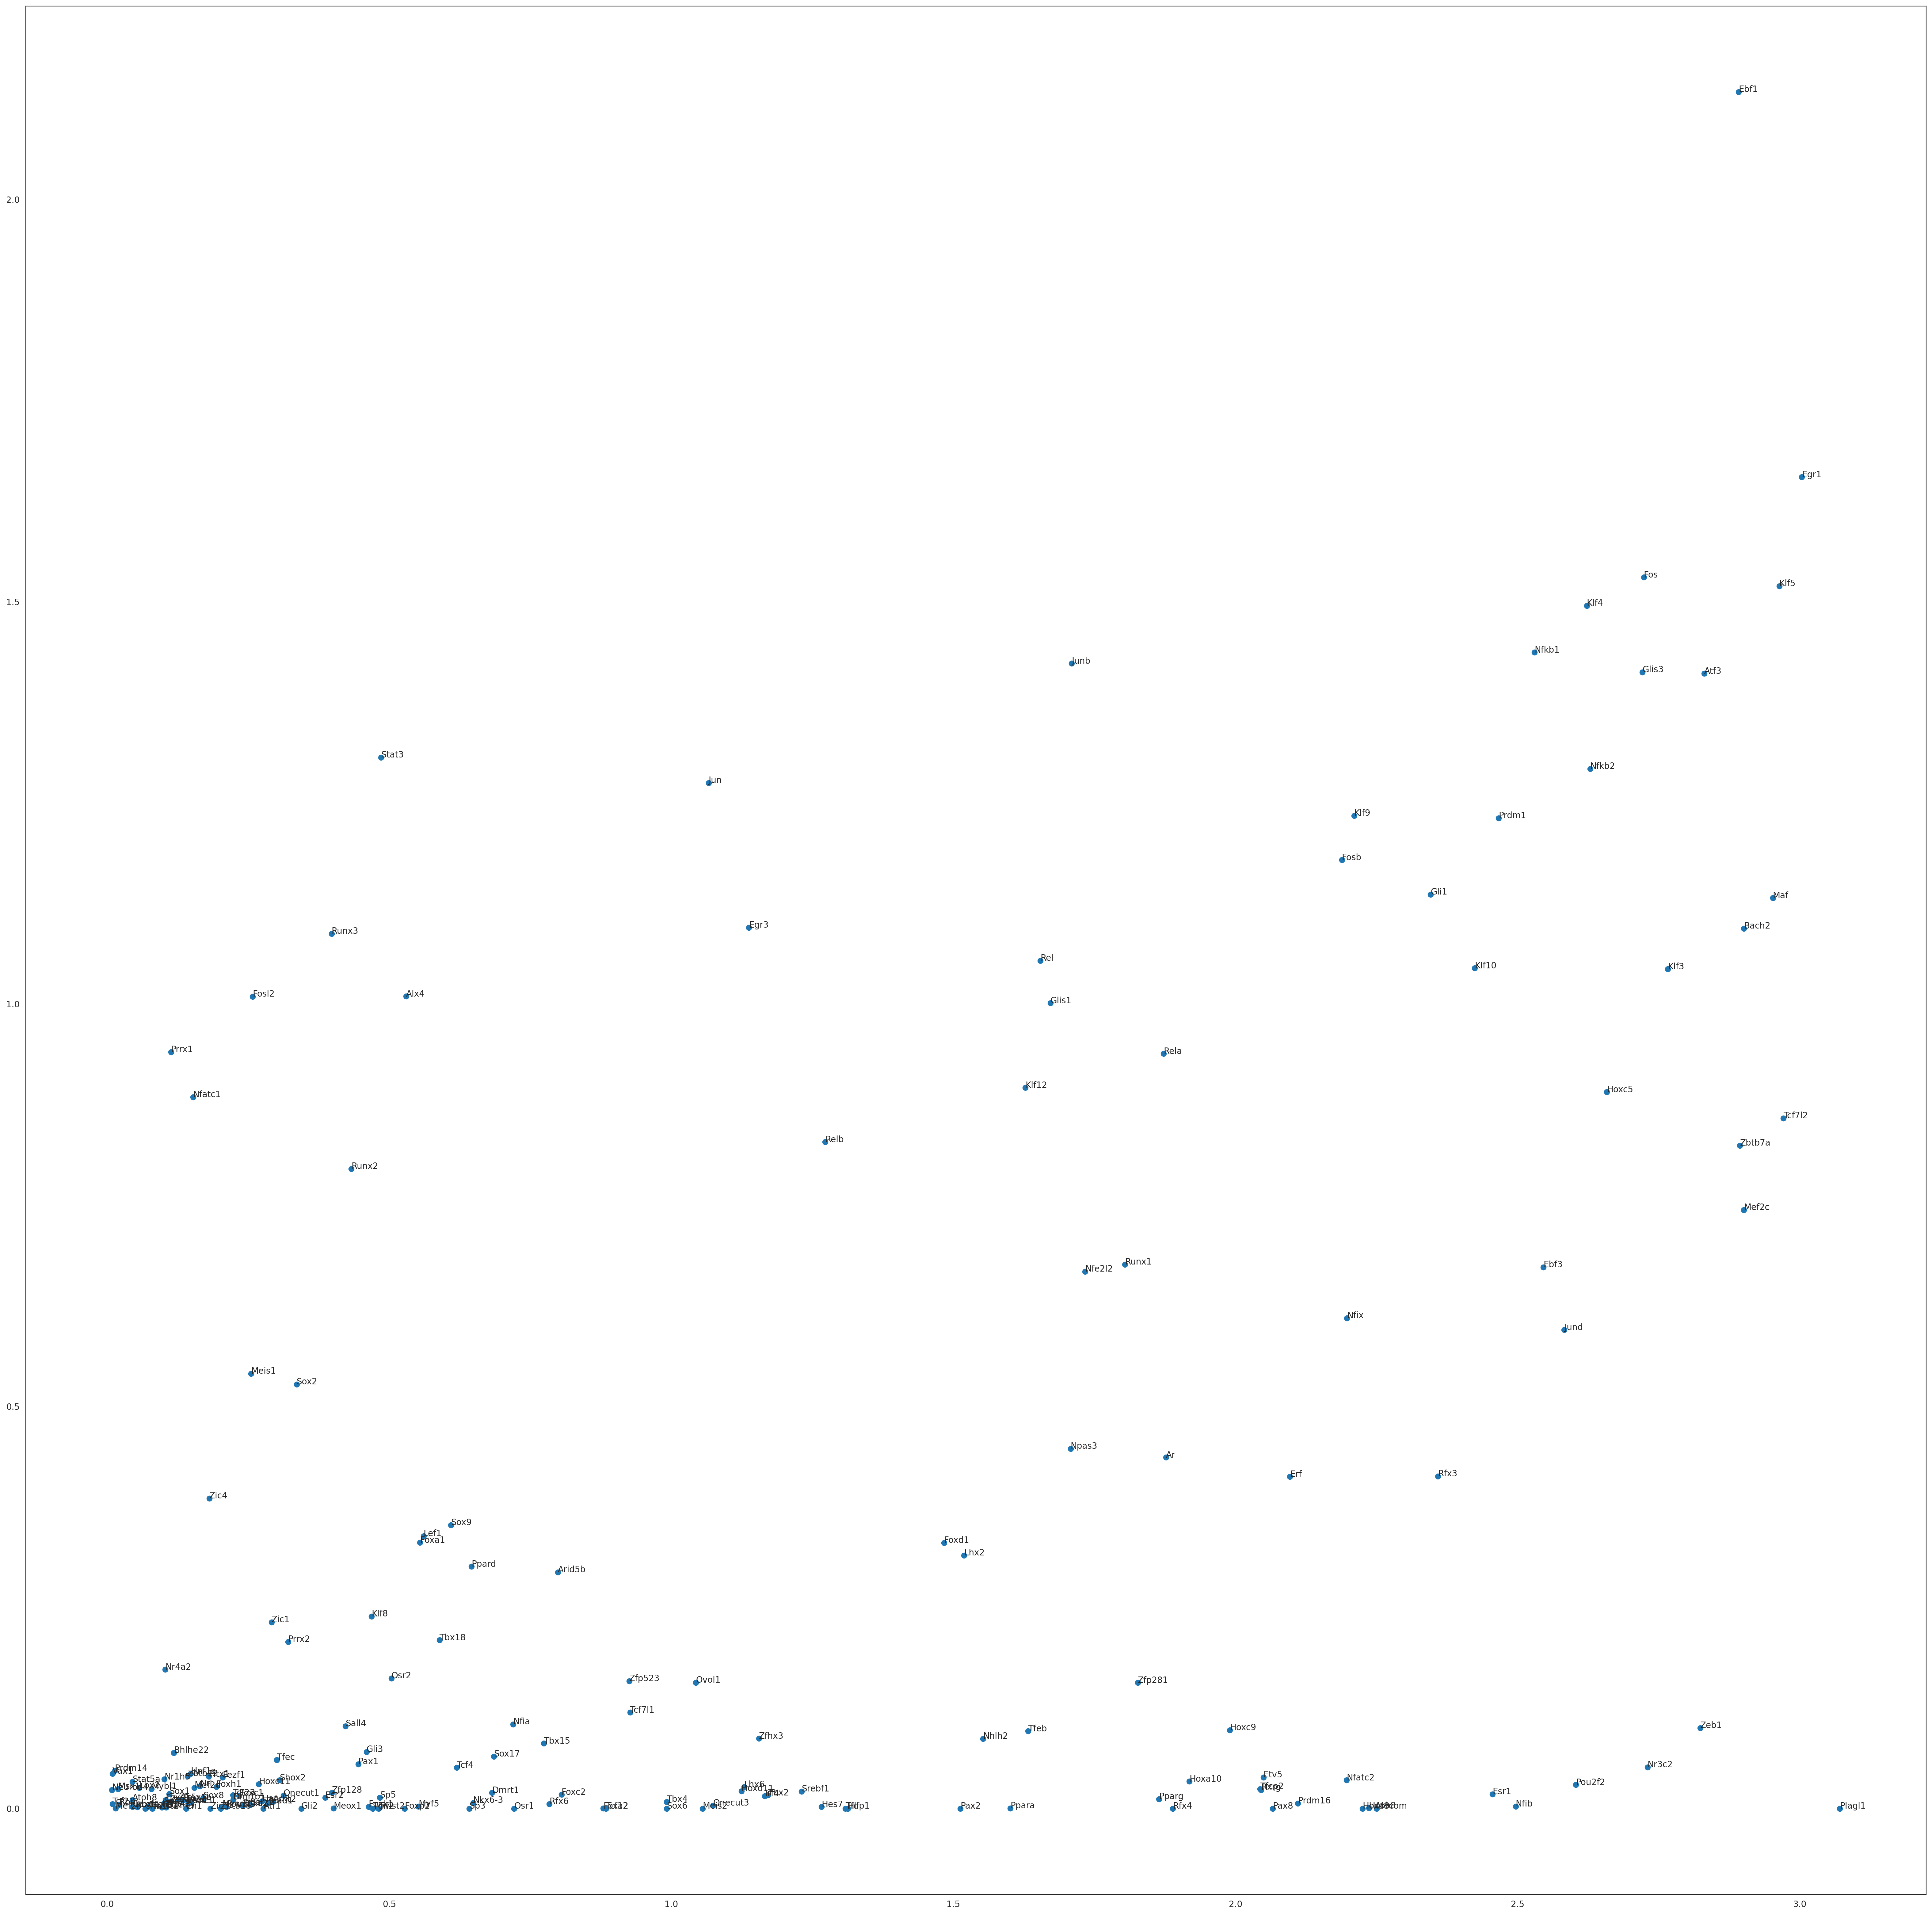

In [12]:
fig, ax = plt.subplots(figsize=[40, 40])
ax.scatter(ps_merged.ps_sum_gm, ps_merged.ps_sum_me)
for idx, (gene, y, x) in ps_merged.iterrows():
    ax.text(s=gene, x=x, y=y)

2024-07-02 22:14:17,546 - INFO - maxp pruned
2024-07-02 22:14:17,560 - INFO - cmap pruned
2024-07-02 22:14:17,561 - INFO - kern dropped
2024-07-02 22:14:17,562 - INFO - post pruned
2024-07-02 22:14:17,562 - INFO - FFTM dropped
2024-07-02 22:14:17,566 - INFO - GPOS pruned
2024-07-02 22:14:17,571 - INFO - GSUB pruned
2024-07-02 22:14:17,581 - INFO - glyf pruned
2024-07-02 22:14:17,583 - INFO - Added gid0 to subset
2024-07-02 22:14:17,583 - INFO - Added first four glyphs to subset
2024-07-02 22:14:17,584 - INFO - Closing glyph list over 'GSUB': 47 glyphs before
2024-07-02 22:14:17,585 - INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'F', 'I', 'J', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'V', 'Z', 'a', 'b', 'bracketleft', 'bracketright', 'c', 'd', 'e', 'f', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'x', 'zero']
2024-07-02 22:14:17,586 - INFO - Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23

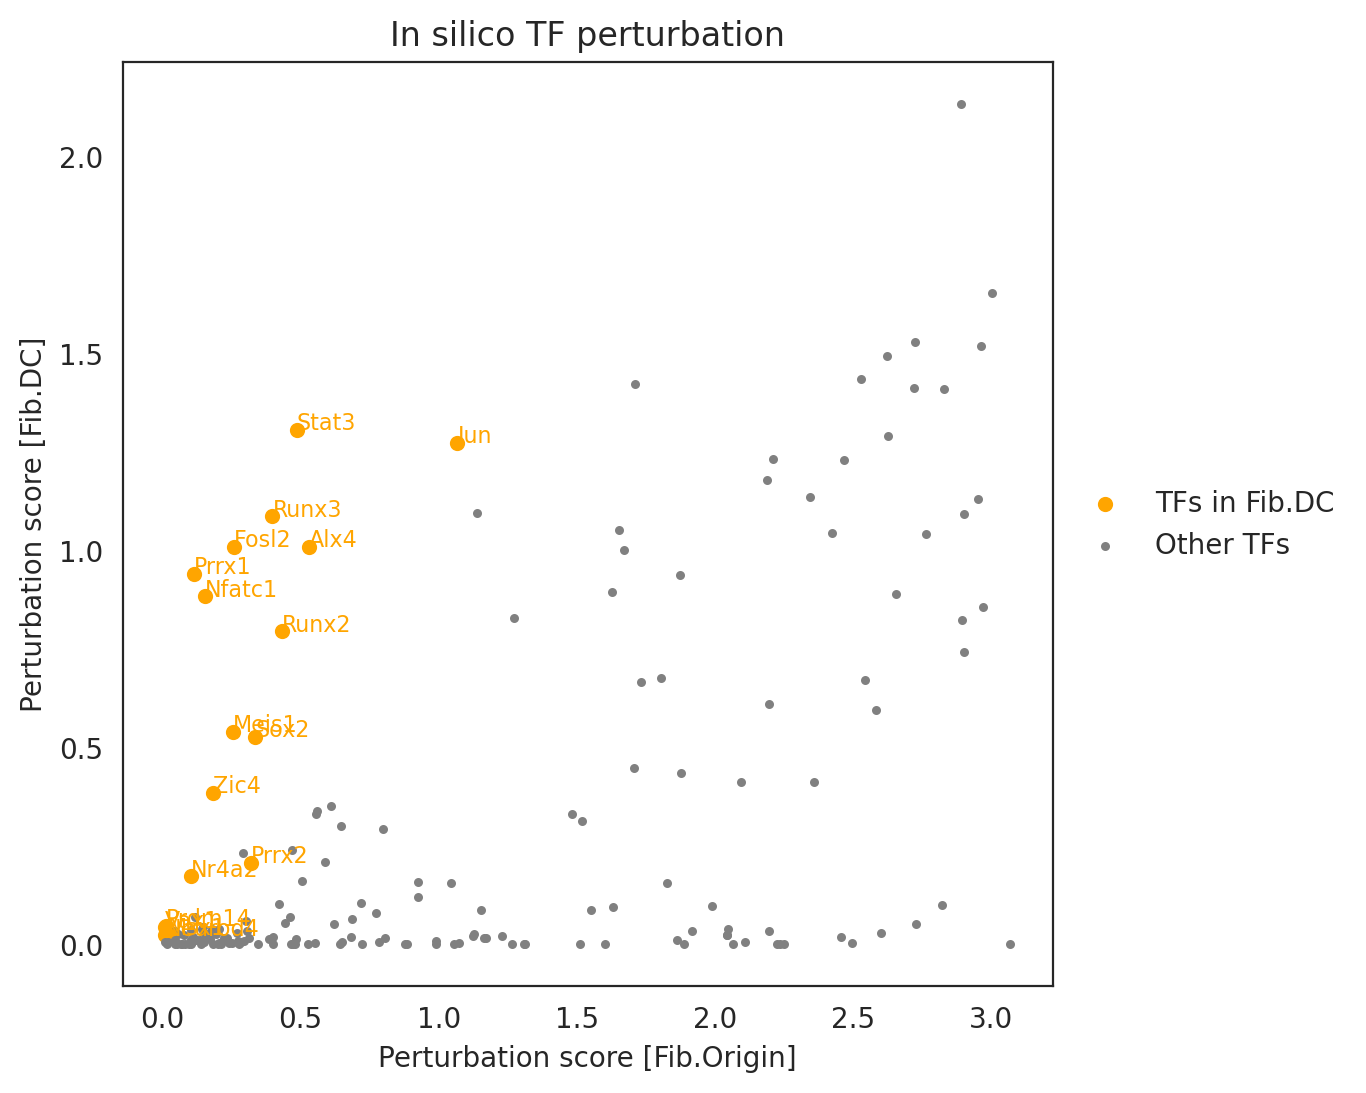

In [118]:
fig, ax = plt.subplots(figsize=[6, 6])

added_orange_label = False
added_grey_label = False

for idx, (gene, y, x) in ps_merged.iterrows():
    if gene in ['Prrx2']:

        ax.scatter(x, y, color='orange', s=20)
        ax.text(s=gene, x=x, y=y, color='Orange', fontsize=8)
    elif y > x:

        if not added_orange_label:
            ax.scatter(x, y, color='orange', s=20, label='TFs in Fib.DC')
            added_orange_label = True
        else:
            ax.scatter(x, y, color='orange', s=20)
        ax.text(s=gene, x=x, y=y, color='orange', fontsize=8)
    else:

        if not added_grey_label:
            ax.scatter(x, y, color='grey', s=5, label='Other TFs')
            added_grey_label = True
        else:
            ax.scatter(x, y, color='grey', s=5)

ax.set_title('In silico TF perturbation')
ax.set_xlabel('Perturbation score [Fib.Origin]')
ax.set_ylabel('Perturbation score [Fib.DC]')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
handles, labels = ax.get_legend_handles_labels()

index_other_tfs = labels.index('Other TFs')

handles.insert(1, handles.pop(index_other_tfs))
labels.insert(1, labels.pop(index_other_tfs))

ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.savefig("./04_Skin_Fibroblast/celloracle/figures/TF_purterhubation.pdf",bbox_inches='tight')